#### **Library Installation**

In [3]:
!pip install -U torch sahi yolov8 ultralytics numpy opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-2.6.0-cp39-cp39-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached numpy-2.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_

In [4]:
# Import required functions and classes
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image, read_image_as_pil
from sahi.utils.file import Path, increment_path, list_files, save_json, save_pickle, download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict, agg_prediction, get_prediction_batched, get_sliced_prediction_batched 
from sahi.prediction import visualize_object_predictions
from IPython.display import Image
from numpy import asarray
import cv2
import os

In [5]:
# Download YOLOv8-S model to 'models/yolov8s.pt'
yolov8_model_path = 'models/yolov8/last.pt'
#download_yolov8s_model(destination_path=yolov8_model_path)

In [6]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov8_model_path,
    confidence_threshold=0.3,
    device="cuda:0", # or 'cpu'
)

#### **Prediction**

In [7]:
import cv2
from PIL import Image

def get_slice_parameters(object_density):
    
    #image_path = "test_data/0000006_06773_d_0000018.jpg"
    #image = Image.open(image_path).convert("RGB")
    #image_width, image_height  = image.size
    #slice_width = image_width
    #slice_height = image_height
    #overlap_width_ratio = 0.0
    #overlap_height_ratio = 0.0

    if object_density >= 50:
        slice_width = 512
        slice_height = 512
        overlap_width_ratio = 0.5
        overlap_height_ratio = 0.5
    elif 25 <= object_density < 50:
        slice_width = 512
        slice_height = 512
        overlap_width_ratio = 0.25
        overlap_height_ratio = 0.25
    elif 10 <= object_density < 25:
        slice_width = 512
        slice_height = 512
        overlap_width_ratio = 0.15
        overlap_height_ratio = 0.15
    else:
        return

    return slice_width, slice_height, overlap_width_ratio, overlap_height_ratio

In [8]:
# Function to get image details by image_id
def get_image_id(coco_data, image_name):
    for image in coco_data["images"]:
        file_name = Path(image['file_name']).stem
        if file_name == image_name:
            return image['id']
    return None

In [9]:
import os
import cv2
import json
import numpy as np
from tqdm import tqdm
import time
from sahi.prediction import ObjectPrediction, PredictionResult

In [7]:
input_folder = 'test_data'
for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(input_folder, filename)
            #image_as_pil = read_image_as_pil(image_path)
            filename_without_ext = Path(filename).stem
            
            print("*****************************************")
            print("File Name", filename_without_ext)

            #img_id = get_image_id(data, filename_without_ext)
            #image_ids.append(image_id)

            # Get predictions from your detection model
            #time_start = time.time()
            prediction = get_prediction(image_path, detection_model, verbose=1) #changes
            #time_end = time.time() - time_start
            #print(f"Prediction Performed in {time_end} seconds")
            
            object_density = len(prediction.object_prediction_list)
            print("Object Density:", object_density)

*****************************************
File Name 9999938_00000_d_0000207


/mmfs1/cm/shared/apps_local/python/3.11/envs/torch11.8/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Prediction performed in 2.454364776611328 seconds.
Object Density: 24
*****************************************
File Name 0000006_05208_d_0000014
Prediction performed in 0.013344049453735352 seconds.
Object Density: 17
*****************************************
File Name 0000370_02000_d_0000254
Prediction performed in 0.012691020965576172 seconds.
Object Density: 2
*****************************************
File Name 0000006_06773_d_0000018
Prediction performed in 0.012737274169921875 seconds.
Object Density: 37
*****************************************
File Name 0000006_05999_d_0000017
Prediction performed in 0.013033866882324219 seconds.
Object Density: 59


In [7]:
input_folder = 'test_data'
for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(input_folder, filename)
            #image_as_pil = read_image_as_pil(image_path)
            filename_without_ext = Path(filename).stem
            
            print("*****************************************")
            print("File Name", filename_without_ext)

            #img_id = get_image_id(data, filename_without_ext)
            #image_ids.append(image_id)

            # Get predictions from your detection model
            #time_start = time.time()
            prediction_batch = get_prediction_batched(image_path, detection_model, verbose=1) #changes
            #time_end = time.time() - time_start
            #print(f"Prediction Performed in {time_end} seconds")
            
            object_density_batch = len(prediction_batch.object_prediction_list)
            print("Object Density:", object_density_batch)

*****************************************
File Name 9999938_00000_d_0000207
Image Type 1 


/mmfs1/cm/shared/apps_local/python/3.11/envs/torch11.8/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SHIFT AMOUNT:  [[0, 0]]
FULL SHAPE:  [None]
Prediction performed in 2.03348708152771 seconds.
Object Density: 24
*****************************************
File Name 0000006_05208_d_0000014
Image Type 1 
SHIFT AMOUNT:  [[0, 0]]
FULL SHAPE:  [None]
Prediction performed in 0.012865304946899414 seconds.
Object Density: 17
*****************************************
File Name 0000370_02000_d_0000254
Image Type 1 
SHIFT AMOUNT:  [[0, 0]]
FULL SHAPE:  [None]
Prediction performed in 0.012907981872558594 seconds.
Object Density: 2
*****************************************
File Name 0000006_06773_d_0000018
Image Type 1 
SHIFT AMOUNT:  [[0, 0]]
FULL SHAPE:  [None]
Prediction performed in 0.012398481369018555 seconds.
Object Density: 37
*****************************************
File Name 0000006_05999_d_0000017
Image Type 1 
SHIFT AMOUNT:  [[0, 0]]
FULL SHAPE:  [None]
Prediction performed in 0.013066530227661133 seconds.
Object Density: 59


In [6]:
slice_width, slice_height, overlap_width_ratio, overlap_height_ratio = get_slice_parameters(30)

In [7]:
input_folder = 'test_data'
for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(input_folder, filename)
            #image_as_pil = read_image_as_pil(image_path)
            filename_without_ext = Path(filename).stem
            
            print("*****************************************")
            print("File Name", filename_without_ext)

            #img_id = get_image_id(data, filename_without_ext)
            #image_ids.append(image_id)

            result_sahi = get_sliced_prediction(
                                image_path,
                                detection_model,
                                slice_height = slice_height,
                                slice_width = slice_width,
                                overlap_height_ratio = overlap_height_ratio,
                                overlap_width_ratio = overlap_width_ratio,
                                postprocess_type = "OptNMS",
                                verbose = 2
                            )
           
            
            object_density_batch = len(result_sahi.object_prediction_list)
            print("Object Density:", object_density_batch)

*****************************************
File Name 9999938_00000_d_0000207
POST PROCESS:  OptNMS
Performing prediction on 8 slices.
SHIFT AMOUNT:  [0, 0]


/mmfs1/cm/shared/apps_local/python/3.11/envs/torch11.8/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SHIFT AMOUNT:  [888, 0]
CLASS TYPE:  False
Original Prediction Count 103
****non_class_agnostic****
Filtered Prediction:  41
Final Bounding Box Count: 40
Filtered Prediction:  43
Final Bounding Box Count: 41
Filtered Prediction:  7
Final Bounding Box Count: 6
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  9
Final Bounding Box Count: 9
Filtered Prediction:  2
Final Bounding Box Count: 2
Slicing performed in 0.011132240295410156 seconds.
Prediction performed in 2.0988528728485107 seconds.
Object Density: 99
*****************************************
File Name 0000006_05208_d_0000014
POST PROCESS:  OptNMS
Performing prediction on 8 slices.
SHIFT AMOUNT:  [0, 0]
SHIFT AMOUNT:  [848, 0]
CLASS TYPE:  False
Original Prediction Count 32
****non_class_agnostic****
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  31
Final Bounding Box Count: 7
Slicing performed in 0.0056002140045166016 seconds.
Prediction performed in 0.06255912780761719 seconds

In [10]:
input_folder = 'test_data'
for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(input_folder, filename)
            print("Image Path:", image_path)
            #image_as_pil = read_image_as_pil(image_path)
            filename_without_ext = Path(filename).stem
            
            print("*****************************************")
            print("File Name", filename_without_ext)

            #img_id = get_image_id(data, filename_without_ext)
            #image_ids.append(image_id)

            result_sahi_batch = get_sliced_prediction_batched(
                                image_path,
                                detection_model,
                                slice_height = slice_height,
                                slice_width = slice_width,
                                overlap_height_ratio = overlap_height_ratio,
                                overlap_width_ratio = overlap_width_ratio,
                                #auto_slice_resolution = False,
                                postprocess_type = "OptNMS",
                                verbose = 2
                            )
           
            
            object_density_batch = len(result_sahi_batch.object_prediction_list)
            print("Object Density:", object_density_batch)

Image Path: test_data/9999938_00000_d_0000207.jpg
*****************************************
File Name 9999938_00000_d_0000207
Performing prediction on 8 number of slices.
SLICED SHIFT AMOUNT:  [[0, 0], [384, 0], [768, 0], [888, 0], [0, 276], [384, 276], [768, 276], [888, 276]]
Image Type 2 
SHIFT AMOUNT:  [[0, 0], [384, 0], [768, 0], [888, 0], [0, 276], [384, 276], [768, 276], [888, 276]]
FULL SHAPE:  [[788, 1400], [788, 1400], [788, 1400], [788, 1400], [788, 1400], [788, 1400], [788, 1400], [788, 1400]]
CLASS TYPE:  False
Original Prediction Count 51
****non_class_agnostic****
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  36
Final Bounding Box Count: 36
Filtered Prediction:  3
Final Bounding Box Count: 3
Filtered Prediction:  3
Final Bounding Box Count: 3
Filtered Prediction:  1
Final Bounding Box Count: 1
Slicing performed in 0.00702214241027832 seconds.
Prediction performed in 0.024980545043945312 seconds.
Object Density: 44
Image Path: test_data/0000006_

In [10]:
import os
import cv2
import json
import numpy as np
from tqdm import tqdm
import time
from sahi.prediction import ObjectPrediction, PredictionResult

# export visualization
def predict_sliced_images(input_folder, dataset_json_path, detection_model):
    """
    Processes all image files in input_folder:
      - Runs predictions using get_prediction function and detection_model.
      - Saves annotated images with bounding boxes in output_folder.
      - Saves prediction details as JSON files in output_folder.
    
    Parameters:
      input_folder (str): Path to the folder containing images.
      output_folder (str): Path to the folder where results will be saved.
      detection_model: Your detection model used for prediction.
    """
    name = "exp"
    save_dir = Path(increment_path(Path("sliced_predictions") / name, exist_ok=False))
    os.makedirs(save_dir, exist_ok=True)

    if dataset_json_path:
        with open(dataset_json_path, "r") as file:
            data = json.load(file)
    
    #color = (0, 255, 0)  # original annotations in green
    visual_bbox_gt_thickness = 3
    visual_bbox_thickness = 2
    visual_text_size = 0.5
    visual_text_thickness = 1
    visual_hide_labels = False
    visual_hide_conf = False
    visual_export_format = 'png'
    sliced_predictions = []
    image_ids = []
    coco_json = []
    
    # Loop over files in the input folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(input_folder, filename)
            image_as_pil = read_image_as_pil(image_path)
            filename_without_ext = Path(filename).stem
            
            print("*****************************************")
            print("File Name", filename_without_ext)

            img_id = get_image_id(data, filename_without_ext)
            #image_ids.append(image_id)
            
            # Get predictions from your detection model

            
            time_start = time.time()
            prediction = get_prediction(image_path, detection_model) #changes
            time_end = time.time() - time_start
            #print(f"Intial Prediction Performed in {time_end} seconds")
            print("Intial Prediction time is: {:.2f} ms".format(time_end * 1000))
            
            object_density = len(prediction.object_prediction_list)
            print("Object Density:", object_density)
            
            if object_density > 10:
                slice_width, slice_height, overlap_width_ratio, overlap_height_ratio = get_slice_parameters(object_density)
    
                print("********* Slice Parameters ***********")
                print("Slice Width: ", slice_width)
                print("Slice Height: ", slice_height)
                print("Overlap Width Ratio: ", overlap_width_ratio)
                print("Overlap Height Ratio: ", overlap_height_ratio)

                time_start_slice = time.time()
                result_sahi = get_sliced_prediction(
                    image_path,
                    detection_model,
                    slice_height = slice_height,
                    slice_width = slice_width,
                    overlap_height_ratio = overlap_height_ratio,
                    overlap_width_ratio = overlap_width_ratio,
                    postprocess_type = "OptNMS",
                    verbose = 2
                )
                time_end_slice = time.time() - time_start_slice
                #print(f"Prediction Performed in {time_end1} seconds")
                print("Sliced Prediction time is: {:.2f} ms".format(time_end_slice * 1000))
                
                coco_prediction = result_sahi.to_coco_predictions(image_id=img_id)

                for idx, predict in enumerate(coco_prediction):
                    if coco_prediction[idx]["bbox"]:
                            coco_json.append(predict)
                    
                sliced_predictions.append(result_sahi)
                
                visualize_object_predictions(
                    np.ascontiguousarray(image_as_pil),
                    object_prediction_list=result_sahi.object_prediction_list,
                    rect_th=visual_bbox_thickness,
                    text_size=visual_text_size,
                    text_th=visual_text_thickness,
                    hide_labels=visual_hide_labels,
                    hide_conf=visual_hide_conf,
                    output_dir=save_dir,
                    file_name=filename_without_ext,
                    export_format=visual_export_format,
                )
                
            else:
                print("Prediction time is: {:.2f} ms".format(time_end * 1000))
                
                coco_prediction = prediction.to_coco_predictions(image_id=img_id)

                for idx, predict in enumerate(coco_prediction):
                    if coco_prediction[idx]["bbox"]:
                            coco_json.append(predict)
                    
                sliced_predictions.append(prediction)
                
                visualize_object_predictions(
                    np.ascontiguousarray(image_as_pil),
                    object_prediction_list=prediction.object_prediction_list,
                    rect_th=visual_bbox_thickness,
                    text_size=visual_text_size,
                    text_th=visual_text_thickness,
                    hide_labels=visual_hide_labels,
                    hide_conf=visual_hide_conf,
                    output_dir=save_dir,
                    file_name=filename_without_ext,
                    export_format=visual_export_format,
                )
        total_time = time_end + time_end_slice
                 
    if dataset_json_path:
        save_path = str(save_dir / "result.json")
        save_json(coco_json, save_path)
        print(f"Prediction results are successfully exported to {save_dir}")
    print(f"Prediction Completed Sucessfully: {len(sliced_predictions)} images")
    print("Total Prediction time is: {:.2f} ms".format(total_time * 1000))
    return sliced_predictions

In [21]:
# Example usage: Adaptive-NMS
source_folder = 'test_data'
json_path = "../data/VisDrone2COCO/COCO/annotations/visdrone_coco_test.json"
result_preds_nms = predict_sliced_images(source_folder, json_path, detection_model)

*****************************************
File Name 9999938_00000_d_0000207
Object Density: 24
********* Slice Parameters ***********
Slice Width:  512
Slice Height:  512
Overlap Width Ratio:  0.15
Overlap Height Ratio:  0.15
Performing prediction on 8 slices.
Total Valid prediction:  102
Total Valid prediction:  58
Total Valid prediction:  10
Total Valid prediction:  2
Total Valid prediction:  1
Total Valid prediction:  8
Total Valid prediction:  11
Slicing performed in 0.00712132453918457 seconds.
Prediction performed in 0.278519868850708 seconds.
Prediction time is: 284.25 ms
*****************************************
File Name 0000006_05208_d_0000014
Object Density: 17
********* Slice Parameters ***********
Slice Width:  512
Slice Height:  512
Overlap Width Ratio:  0.15
Overlap Height Ratio:  0.15
Performing prediction on 6 slices.
Total Valid prediction:  1
Total Valid prediction:  2
Total Valid prediction:  8
Slicing performed in 0.0053369998931884766 seconds.
Prediction performed

#### **Evaluation**

In [9]:
#USING NMS METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_data.json' --result_json_path './runs/predict/exp133/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.56s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.252
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.368
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.285
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.332
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.701
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.360
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.245
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.515
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [10]:
#USING GREEDY_NMM METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_data.json' --result_json_path './runs/predict/exp132/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.56s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.212
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.348
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.239
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.329
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.683
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.228
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.224
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.408
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [11]:
#USING NMM METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_data.json' --result_json_path './runs/predict/exp131/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.56s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.211
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.342
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.238
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.328
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.662
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.228
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.224
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.403
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [14]:
#USING OPTIMIZED-NMS METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_data.json' --result_json_path './runs/predict/exp134/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.45s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.153
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.235
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.162
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.274
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.463
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.209
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.214
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.320
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [19]:
#USING ADAPTIVE-OPTIMIZED-NMS METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_data.json' --result_json_path './sliced_predictions/exp31/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.41s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.256
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.364
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.292
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.325
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.658
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.350
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.231
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.490
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [22]:
#USING ADAPTIVE-NMS METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_data.json' --result_json_path './sliced_predictions/exp32/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.40s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.256
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.364
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.292
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.325
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.658
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.350
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.231
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.490
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [14]:
#USING Adaptive-Optimized-NMS-IoU METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_data_10.json' --result_json_path './runs/predict/exp139/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.88s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.149
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.224
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.156
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.188
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.130
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.930
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.093
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.051
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [16]:
#USING Adaptive-Optimized-NMS-IoU METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_data_10.json' --result_json_path './runs/predict/exp169/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.88s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.149
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.224
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.156
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.188
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.130
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.930
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.093
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.051
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

#### **Subset of 10 images**

In [15]:
result_predict_nms_10_2 = predict(source='./test_visdrone_data',
                         dataset_json_path = './subset_visdrone_test_data_10.json',
                         model_type = 'ultralytics',
                         model_path = 'models/yolov8/last.pt',
                         slice_height = 512,
                         slice_width = 512,
                         overlap_height_ratio = 0.5,
                         overlap_width_ratio = 0.5,
                         postprocess_type = "NMS",
                         verbose = 2
                        )

POST PROCESSING: NMS
indexing coco dataset annotations...


Performing inference on images:   0%|          | 0/10 [00:00<?, ?it/s]

Image Name: 0000074_03738_d_0000007
Image Size:  (1920, 1080)
POST PROCESS:  NMS
Performing prediction on 28 slices.


Performing inference on images:  10%|█         | 1/10 [00:00<00:06,  1.36it/s]

Total Valid prediction:  76
Total Valid prediction:  10
Total Valid prediction:  7
Total Valid prediction:  2
Total Valid prediction:  2
Prediction time is: 533.65 ms


Performing inference on images:  10%|█         | 1/10 [00:00<00:06,  1.36it/s]

Image Name: 0000074_07850_d_0000015
Image Size:  (1920, 1080)
POST PROCESS:  NMS
Performing prediction on 28 slices.


Performing inference on images:  10%|█         | 1/10 [00:01<00:06,  1.36it/s]

Total Valid prediction:  144
Total Valid prediction:  5
Total Valid prediction:  3
Total Valid prediction:  6
Total Valid prediction:  4
Total Valid prediction:  1
Total Valid prediction:  4
Prediction time is: 491.19 ms


Performing inference on images:  20%|██        | 2/10 [00:01<00:05,  1.38it/s]

Image Name: 0000074_02723_d_0000005
Image Size:  (1920, 1080)
POST PROCESS:  NMS
Performing prediction on 28 slices.


Performing inference on images:  30%|███       | 3/10 [00:02<00:05,  1.34it/s]

Total Valid prediction:  88
Total Valid prediction:  3
Total Valid prediction:  14
Total Valid prediction:  7
Total Valid prediction:  2
Total Valid prediction:  1
Total Valid prediction:  1
Prediction time is: 578.45 ms
Image Name: 0000074_08202_d_0000016
Image Size:  (1920, 1080)


Performing inference on images:  30%|███       | 3/10 [00:02<00:05,  1.34it/s]

POST PROCESS:  NMS
Performing prediction on 28 slices.


Performing inference on images:  30%|███       | 3/10 [00:02<00:05,  1.34it/s]

Total Valid prediction:  124
Total Valid prediction:  2
Total Valid prediction:  7
Total Valid prediction:  1
Total Valid prediction:  1
Total Valid prediction:  2
Prediction time is: 487.95 ms


Performing inference on images:  40%|████      | 4/10 [00:02<00:04,  1.37it/s]

Image Name: 0000073_05999_d_0000007
Image Size:  (1920, 1080)
POST PROCESS:  NMS
Performing prediction on 28 slices.


Performing inference on images:  50%|█████     | 5/10 [00:03<00:03,  1.40it/s]

Total Valid prediction:  108
Total Valid prediction:  4
Total Valid prediction:  8
Total Valid prediction:  1
Total Valid prediction:  1
Prediction time is: 482.31 ms


Performing inference on images:  50%|█████     | 5/10 [00:03<00:03,  1.40it/s]

Image Name: 0000074_05715_d_0000011
Image Size:  (1920, 1080)
POST PROCESS:  NMS
Performing prediction on 28 slices.


Performing inference on images:  60%|██████    | 6/10 [00:04<00:02,  1.42it/s]

Total Valid prediction:  108
Total Valid prediction:  9
Total Valid prediction:  1
Total Valid prediction:  7
Total Valid prediction:  2
Total Valid prediction:  3
Prediction time is: 480.90 ms


Performing inference on images:  60%|██████    | 6/10 [00:04<00:02,  1.42it/s]

Image Name: 0000074_07297_d_0000014
Image Size:  (1920, 1080)
POST PROCESS:  NMS
Performing prediction on 28 slices.


Performing inference on images:  60%|██████    | 6/10 [00:04<00:02,  1.42it/s]

Total Valid prediction:  137
Total Valid prediction:  13
Total Valid prediction:  1
Total Valid prediction:  9
Total Valid prediction:  1
Total Valid prediction:  2
Prediction time is: 497.43 ms


Performing inference on images:  70%|███████   | 7/10 [00:05<00:02,  1.41it/s]

Image Name: 0000074_06746_d_0000013
Image Size:  (1920, 1080)
POST PROCESS:  NMS
Performing prediction on 28 slices.


Performing inference on images:  70%|███████   | 7/10 [00:05<00:02,  1.41it/s]

Total Valid prediction:  121
Total Valid prediction:  6
Total Valid prediction:  4
Total Valid prediction:  1
Total Valid prediction:  1
Total Valid prediction:  2
Total Valid prediction:  5
Prediction time is: 487.94 ms


Performing inference on images:  80%|████████  | 8/10 [00:05<00:01,  1.41it/s]

Image Name: 0000074_01218_d_0000002
Image Size:  (1920, 1080)
POST PROCESS:  NMS
Performing prediction on 28 slices.


Performing inference on images:  90%|█████████ | 9/10 [00:06<00:00,  1.43it/s]

Total Valid prediction:  106
Total Valid prediction:  5
Total Valid prediction:  1
Total Valid prediction:  8
Total Valid prediction:  21
Total Valid prediction:  3
Total Valid prediction:  4
Prediction time is: 480.29 ms
Image Name: 0000074_08777_d_0000017
Image Size:  (1920, 1080)


Performing inference on images:  90%|█████████ | 9/10 [00:06<00:00,  1.43it/s]

POST PROCESS:  NMS
Performing prediction on 28 slices.


Performing inference on images: 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

Total Valid prediction:  27
Total Valid prediction:  3
Total Valid prediction:  25
Total Valid prediction:  4
Total Valid prediction:  6
Total Valid prediction:  6
Total Valid prediction:  3
Prediction time is: 455.35 ms
Prediction results are successfully exported to runs/predict/exp169
Model loaded in 0.19444942474365234 seconds.
Slicing performed in 0.024008989334106445 seconds.
Prediction performed in 4.97547721862793 seconds.
Exporting performed in 0.0736701488494873 seconds.


In [9]:
result_predict_nms_10 = predict(source='./test_visdrone_data',
                         dataset_json_path = './subset_visdrone_test_data_10.json',
                         model_type = 'ultralytics',
                         model_path = 'models/yolov8/last.pt',
                         slice_height = 512,
                         slice_width = 512,
                         overlap_height_ratio = 0.5,
                         overlap_width_ratio = 0.5,
                         postprocess_type = "NMS",
                         verbose = 2
                        )

POST PROCESSING: NMS
indexing coco dataset annotations...


Performing inference on images:   0%|          | 0/10 [00:00<?, ?it/s]

Image Name: 0000074_03738_d_0000007
Image Size:  (1920, 1080)
Performing prediction on 28 slices.


Performing inference on images:  10%|█         | 1/10 [00:00<00:06,  1.39it/s]

Total Valid prediction:  76
Total Valid prediction:  10
Total Valid prediction:  7
Total Valid prediction:  2
Total Valid prediction:  2
Prediction time is: 523.19 ms


Performing inference on images:  10%|█         | 1/10 [00:00<00:06,  1.39it/s]

Image Name: 0000074_07850_d_0000015
Image Size:  (1920, 1080)
Performing prediction on 28 slices.


Performing inference on images:  10%|█         | 1/10 [00:01<00:06,  1.39it/s]

Total Valid prediction:  144
Total Valid prediction:  5
Total Valid prediction:  3
Total Valid prediction:  6
Total Valid prediction:  4
Total Valid prediction:  1
Total Valid prediction:  4
Prediction time is: 484.49 ms


Performing inference on images:  20%|██        | 2/10 [00:01<00:05,  1.40it/s]

Image Name: 0000074_02723_d_0000005
Image Size:  (1920, 1080)
Performing prediction on 28 slices.


Performing inference on images:  30%|███       | 3/10 [00:02<00:04,  1.45it/s]

Total Valid prediction:  88
Total Valid prediction:  3
Total Valid prediction:  14
Total Valid prediction:  7
Total Valid prediction:  2
Total Valid prediction:  1
Total Valid prediction:  1
Prediction time is: 468.97 ms
Image Name: 0000074_08202_d_0000016
Image Size:  (1920, 1080)


Performing inference on images:  30%|███       | 3/10 [00:02<00:04,  1.45it/s]

Performing prediction on 28 slices.


Performing inference on images:  30%|███       | 3/10 [00:02<00:04,  1.45it/s]

Total Valid prediction:  124
Total Valid prediction:  2
Total Valid prediction:  7
Total Valid prediction:  1
Total Valid prediction:  1
Total Valid prediction:  2
Prediction time is: 475.33 ms


Performing inference on images:  40%|████      | 4/10 [00:02<00:04,  1.45it/s]

Image Name: 0000073_05999_d_0000007
Image Size:  (1920, 1080)
Performing prediction on 28 slices.


Performing inference on images:  40%|████      | 4/10 [00:03<00:04,  1.45it/s]

Total Valid prediction:  108
Total Valid prediction:  4
Total Valid prediction:  8
Total Valid prediction:  1
Total Valid prediction:  1
Prediction time is: 484.35 ms


Performing inference on images:  50%|█████     | 5/10 [00:03<00:03,  1.45it/s]

Image Name: 0000074_05715_d_0000011
Image Size:  (1920, 1080)
Performing prediction on 28 slices.


Performing inference on images:  50%|█████     | 5/10 [00:03<00:03,  1.45it/s]

Total Valid prediction:  108
Total Valid prediction:  9
Total Valid prediction:  1
Total Valid prediction:  7
Total Valid prediction:  2
Total Valid prediction:  3
Prediction time is: 474.89 ms


Performing inference on images:  60%|██████    | 6/10 [00:04<00:03,  1.30it/s]

Image Name: 0000074_07297_d_0000014
Image Size:  (1920, 1080)
Performing prediction on 28 slices.


Performing inference on images:  60%|██████    | 6/10 [00:04<00:03,  1.30it/s]

Total Valid prediction:  137
Total Valid prediction:  13
Total Valid prediction:  1
Total Valid prediction:  9
Total Valid prediction:  1
Total Valid prediction:  2
Prediction time is: 504.26 ms


Performing inference on images:  70%|███████   | 7/10 [00:05<00:02,  1.33it/s]

Image Name: 0000074_06746_d_0000013
Image Size:  (1920, 1080)
Performing prediction on 28 slices.


Performing inference on images:  70%|███████   | 7/10 [00:05<00:02,  1.33it/s]

Total Valid prediction:  121
Total Valid prediction:  6
Total Valid prediction:  4
Total Valid prediction:  1
Total Valid prediction:  1
Total Valid prediction:  2
Total Valid prediction:  5
Prediction time is: 478.48 ms


Performing inference on images:  80%|████████  | 8/10 [00:05<00:01,  1.36it/s]

Image Name: 0000074_01218_d_0000002
Image Size:  (1920, 1080)
Performing prediction on 28 slices.


Performing inference on images:  90%|█████████ | 9/10 [00:06<00:00,  1.40it/s]

Total Valid prediction:  106
Total Valid prediction:  5
Total Valid prediction:  1
Total Valid prediction:  8
Total Valid prediction:  21
Total Valid prediction:  3
Total Valid prediction:  4
Prediction time is: 470.04 ms


Performing inference on images:  90%|█████████ | 9/10 [00:06<00:00,  1.40it/s]

Image Name: 0000074_08777_d_0000017
Image Size:  (1920, 1080)
Performing prediction on 28 slices.


Performing inference on images: 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

Total Valid prediction:  27
Total Valid prediction:  3
Total Valid prediction:  25
Total Valid prediction:  4
Total Valid prediction:  6
Total Valid prediction:  6
Total Valid prediction:  3
Prediction time is: 453.35 ms
Prediction results are successfully exported to runs/predict/exp139
Model loaded in 0.034912109375 seconds.
Slicing performed in 0.0237576961517334 seconds.
Prediction performed in 4.8173418045043945 seconds.
Exporting performed in 0.07450699806213379 seconds.


In [8]:
result_predict_greedynms_10 = predict(source='./test_visdrone_data',
                         dataset_json_path = './subset_visdrone_test_data_10.json',
                         model_type = 'ultralytics',
                         model_path = 'models/yolov8/last.pt',
                         slice_height = 512,
                         slice_width = 512,
                         overlap_height_ratio = 0.5,
                         overlap_width_ratio = 0.5,
                         postprocess_type = "GREEDYNMM",
                         verbose = 2
                        )

POST PROCESSING: GREEDYNMM
indexing coco dataset annotations...


Performing inference on images:   0%|          | 0/10 [00:00<?, ?it/s]

Image Name: 0000074_03738_d_0000007
Image Size:  (1920, 1080)
Performing prediction on 28 slices.


Performing inference on images:  10%|█         | 1/10 [00:00<00:06,  1.35it/s]

Prediction time is: 540.39 ms
Image Name: 0000074_07850_d_0000015
Image Size:  (1920, 1080)


Performing inference on images:  10%|█         | 1/10 [00:00<00:06,  1.35it/s]

Performing prediction on 28 slices.


Performing inference on images:  10%|█         | 1/10 [00:01<00:06,  1.35it/s]

Prediction time is: 514.90 ms


Performing inference on images:  20%|██        | 2/10 [00:01<00:05,  1.35it/s]

Image Name: 0000074_02723_d_0000005
Image Size:  (1920, 1080)
Performing prediction on 28 slices.


Performing inference on images:  30%|███       | 3/10 [00:02<00:05,  1.40it/s]

Prediction time is: 486.87 ms
Image Name: 0000074_08202_d_0000016
Image Size:  (1920, 1080)


Performing inference on images:  30%|███       | 3/10 [00:02<00:05,  1.40it/s]

Performing prediction on 28 slices.


Performing inference on images:  30%|███       | 3/10 [00:02<00:05,  1.40it/s]

Prediction time is: 500.68 ms


Performing inference on images:  40%|████      | 4/10 [00:02<00:04,  1.40it/s]

Image Name: 0000073_05999_d_0000007
Image Size:  (1920, 1080)
Performing prediction on 28 slices.


Performing inference on images:  50%|█████     | 5/10 [00:03<00:03,  1.41it/s]

Prediction time is: 489.15 ms


Performing inference on images:  50%|█████     | 5/10 [00:03<00:03,  1.41it/s]

Image Name: 0000074_05715_d_0000011
Image Size:  (1920, 1080)
Performing prediction on 28 slices.


Performing inference on images:  60%|██████    | 6/10 [00:04<00:02,  1.41it/s]

Prediction time is: 501.61 ms


Performing inference on images:  60%|██████    | 6/10 [00:04<00:02,  1.41it/s]

Image Name: 0000074_07297_d_0000014
Image Size:  (1920, 1080)
Performing prediction on 28 slices.


Performing inference on images:  60%|██████    | 6/10 [00:04<00:02,  1.41it/s]

Prediction time is: 515.97 ms


Performing inference on images:  70%|███████   | 7/10 [00:05<00:02,  1.39it/s]

Image Name: 0000074_06746_d_0000013
Image Size:  (1920, 1080)
Performing prediction on 28 slices.


Performing inference on images:  70%|███████   | 7/10 [00:05<00:02,  1.39it/s]

Prediction time is: 507.32 ms


Performing inference on images:  80%|████████  | 8/10 [00:05<00:01,  1.38it/s]

Image Name: 0000074_01218_d_0000002
Image Size:  (1920, 1080)
Performing prediction on 28 slices.


Performing inference on images:  90%|█████████ | 9/10 [00:06<00:00,  1.32it/s]

Prediction time is: 633.34 ms
Image Name: 0000074_08777_d_0000017
Image Size:  (1920, 1080)


Performing inference on images:  90%|█████████ | 9/10 [00:06<00:00,  1.32it/s]

Performing prediction on 28 slices.


Performing inference on images: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

Prediction time is: 460.32 ms
Prediction results are successfully exported to runs/predict/exp138
Model loaded in 0.02989506721496582 seconds.
Slicing performed in 0.02394843101501465 seconds.
Prediction performed in 5.15054726600647 seconds.
Exporting performed in 0.07433342933654785 seconds.


In [11]:
# Example usage: Adaptive-NMS
source_folder = './test_visdrone_data/images'
json_path = "./subset_visdrone_test_data_10.json"
result_preds_nms_latest = predict_sliced_images(source_folder, json_path, detection_model)

*****************************************
File Name 0000074_03738_d_0000007


/mmfs1/cm/shared/apps_local/python/3.11/envs/torch11.8/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Intial Prediction time is: 8349.14 ms
Object Density: 52
********* Slice Parameters ***********
Slice Width:  512
Slice Height:  512
Overlap Width Ratio:  0.5
Overlap Height Ratio:  0.5
POST PROCESS:  OptNMS
Performing prediction on 28 slices.
Original Prediction Count 408
Filtered Prediction:  382
Final Bounding Box Count: 78
Filtered Prediction:  12
Final Bounding Box Count: 8
Filtered Prediction:  10
Final Bounding Box Count: 6
Filtered Prediction:  2
Final Bounding Box Count: 2
Filtered Prediction:  2
Final Bounding Box Count: 2
Slicing performed in 0.011339664459228516 seconds.
Prediction performed in 0.5429737567901611 seconds.
Sliced Prediction time is: 551.28 ms
*****************************************
File Name 0000074_07850_d_0000015
Intial Prediction time is: 37.87 ms
Object Density: 53
********* Slice Parameters ***********
Slice Width:  512
Slice Height:  512
Overlap Width Ratio:  0.5
Overlap Height Ratio:  0.5
POST PROCESS:  OptNMS
Performing prediction on 28 slices.
Ori

In [12]:
# Example usage: Adaptive-NMS
source_folder = './test_visdrone_data/images'
json_path = "./subset_visdrone_test_data_10.json"
result_preds_nms_take2 = predict_sliced_images(source_folder, json_path, detection_model)

*****************************************
File Name 0000074_03738_d_0000007
Intial Prediction time is: 36.30 ms
Object Density: 52
********* Slice Parameters ***********
Slice Width:  512
Slice Height:  512
Overlap Width Ratio:  0.5
Overlap Height Ratio:  0.5
POST PROCESS:  OptNMS
Performing prediction on 28 slices.
Original Prediction Count 408
Filtered Prediction:  382
Final Bounding Box Count: 78
Filtered Prediction:  12
Final Bounding Box Count: 8
Filtered Prediction:  10
Final Bounding Box Count: 6
Filtered Prediction:  2
Final Bounding Box Count: 2
Filtered Prediction:  2
Final Bounding Box Count: 2
Slicing performed in 0.009928226470947266 seconds.
Prediction performed in 0.48382115364074707 seconds.
Sliced Prediction time is: 492.51 ms
*****************************************
File Name 0000074_07850_d_0000015
Intial Prediction time is: 37.57 ms
Object Density: 53
********* Slice Parameters ***********
Slice Width:  512
Slice Height:  512
Overlap Width Ratio:  0.5
Overlap Heigh

In [15]:
# Example usage: Adaptive-NMS
source_folder = './test_visdrone_data/images'
json_path = "./subset_visdrone_test_data_10.json"
result_preds_nms = predict_sliced_images(source_folder, json_path, detection_model)

*****************************************
File Name 0000074_03738_d_0000007
Object Density: 52
********* Slice Parameters ***********
Slice Width:  512
Slice Height:  512
Overlap Width Ratio:  0.5
Overlap Height Ratio:  0.5
Performing prediction on 28 slices.
Total Valid prediction:  69
Total Valid prediction:  8
Total Valid prediction:  6
Total Valid prediction:  2
Total Valid prediction:  2
Slicing performed in 0.010466337203979492 seconds.
Prediction performed in 0.48638367652893066 seconds.
Prediction time is: 494.95 ms
*****************************************
File Name 0000074_07850_d_0000015
Object Density: 53
********* Slice Parameters ***********
Slice Width:  512
Slice Height:  512
Overlap Width Ratio:  0.5
Overlap Height Ratio:  0.5
Performing prediction on 28 slices.
Total Valid prediction:  130
Total Valid prediction:  4
Total Valid prediction:  3
Total Valid prediction:  6
Total Valid prediction:  2
Total Valid prediction:  1
Total Valid prediction:  1
Slicing performed i

In [4]:
result_predict_adaptiveoptnms_10 = predict(source='./test_visdrone_data',
                         dataset_json_path = './subset_visdrone_test_data_10.json',
                         model_type = 'ultralytics',
                         model_path = 'models/yolov8/last.pt',
                         slice_height = 512,
                         slice_width = 512,
                         overlap_height_ratio = 0.5,
                         overlap_width_ratio = 0.5,
                         postprocess_type = "OptNMS",
                         verbose = 2
                        )

POST PROCESSING: OptNMS
indexing coco dataset annotations...


Performing inference on images:   0%|          | 0/10 [00:00<?, ?it/s]

Image Name: 0000074_03738_d_0000007
Image Size:  (1920, 1080)
POST PROCESS:  OptNMS
Performing prediction on 28 slices.


/mmfs1/cm/shared/apps_local/python/3.11/envs/torch11.8/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Performing inference on images:   0%|          | 0/10 [00:02<?, ?it/s]

CLASS TYPE:  False
Original Prediction Count 548
****non_class_agnostic****
Filtered Prediction:  382
Final Bounding Box Count: 78
Filtered Prediction:  12
Final Bounding Box Count: 8
Filtered Prediction:  10
Final Bounding Box Count: 6
Filtered Prediction:  2
Final Bounding Box Count: 2
Filtered Prediction:  2
Final Bounding Box Count: 2
Prediction time is: 2780.96 ms


Performing inference on images:  10%|█         | 1/10 [00:03<00:27,  3.01s/it]

Image Name: 0000074_07850_d_0000015
Image Size:  (1920, 1080)
POST PROCESS:  OptNMS
Performing prediction on 28 slices.


Performing inference on images:  10%|█         | 1/10 [00:03<00:27,  3.01s/it]

CLASS TYPE:  False
Original Prediction Count 1004
****non_class_agnostic****
Filtered Prediction:  795
Final Bounding Box Count: 145
Filtered Prediction:  10
Final Bounding Box Count: 4
Filtered Prediction:  3
Final Bounding Box Count: 3
Filtered Prediction:  9
Final Bounding Box Count: 6
Filtered Prediction:  5
Final Bounding Box Count: 2
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  3
Final Bounding Box Count: 1
Prediction time is: 485.26 ms


Performing inference on images:  20%|██        | 2/10 [00:03<00:13,  1.66s/it]

Image Name: 0000074_02723_d_0000005
Image Size:  (1920, 1080)
POST PROCESS:  OptNMS
Performing prediction on 28 slices.


Performing inference on images:  20%|██        | 2/10 [00:04<00:13,  1.66s/it]

CLASS TYPE:  False
Original Prediction Count 638
****non_class_agnostic****
Filtered Prediction:  452
Final Bounding Box Count: 86
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  22
Final Bounding Box Count: 11
Filtered Prediction:  5
Final Bounding Box Count: 4
Filtered Prediction:  4
Final Bounding Box Count: 2
Prediction time is: 465.83 ms


Performing inference on images:  30%|███       | 3/10 [00:04<00:08,  1.21s/it]

Image Name: 0000074_08202_d_0000016
Image Size:  (1920, 1080)
POST PROCESS:  OptNMS
Performing prediction on 28 slices.


Performing inference on images:  30%|███       | 3/10 [00:04<00:08,  1.21s/it]

CLASS TYPE:  False
Original Prediction Count 869
****non_class_agnostic****
Filtered Prediction:  658
Final Bounding Box Count: 126
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  10
Final Bounding Box Count: 6
Filtered Prediction:  3
Final Bounding Box Count: 1
Prediction time is: 473.45 ms


Performing inference on images:  40%|████      | 4/10 [00:05<00:06,  1.01s/it]

Image Name: 0000073_05999_d_0000007
Image Size:  (1920, 1080)
POST PROCESS:  OptNMS
Performing prediction on 28 slices.


Performing inference on images:  40%|████      | 4/10 [00:05<00:06,  1.01s/it]

CLASS TYPE:  False
Original Prediction Count 677
****non_class_agnostic****
Filtered Prediction:  485
Final Bounding Box Count: 101
Filtered Prediction:  3
Final Bounding Box Count: 2
Filtered Prediction:  10
Final Bounding Box Count: 4
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  1
Final Bounding Box Count: 1
Prediction time is: 467.20 ms


Performing inference on images:  50%|█████     | 5/10 [00:05<00:04,  1.13it/s]

Image Name: 0000074_05715_d_0000011
Image Size:  (1920, 1080)
POST PROCESS:  OptNMS
Performing prediction on 28 slices.


Performing inference on images:  50%|█████     | 5/10 [00:06<00:04,  1.13it/s]

CLASS TYPE:  False
Original Prediction Count 699
****non_class_agnostic****
Filtered Prediction:  498
Final Bounding Box Count: 100
Filtered Prediction:  23
Final Bounding Box Count: 7
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  23
Final Bounding Box Count: 6
Filtered Prediction:  5
Final Bounding Box Count: 2
Filtered Prediction:  3
Final Bounding Box Count: 2
Prediction time is: 470.52 ms


Performing inference on images:  60%|██████    | 6/10 [00:06<00:03,  1.22it/s]

Image Name: 0000074_07297_d_0000014
Image Size:  (1920, 1080)
POST PROCESS:  OptNMS
Performing prediction on 28 slices.


Performing inference on images:  60%|██████    | 6/10 [00:06<00:03,  1.22it/s]

CLASS TYPE:  False
Original Prediction Count 984
****non_class_agnostic****
Filtered Prediction:  684
Final Bounding Box Count: 134
Filtered Prediction:  20
Final Bounding Box Count: 6
Filtered Prediction:  30
Final Bounding Box Count: 8
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  1
Final Bounding Box Count: 1
Prediction time is: 479.61 ms


Performing inference on images:  70%|███████   | 7/10 [00:07<00:02,  1.28it/s]

Image Name: 0000074_06746_d_0000013
Image Size:  (1920, 1080)
POST PROCESS:  OptNMS
Performing prediction on 28 slices.


Performing inference on images:  70%|███████   | 7/10 [00:07<00:02,  1.28it/s]

CLASS TYPE:  False
Original Prediction Count 893
****non_class_agnostic****
Filtered Prediction:  644
Final Bounding Box Count: 129
Filtered Prediction:  14
Final Bounding Box Count: 7
Filtered Prediction:  7
Final Bounding Box Count: 3
Filtered Prediction:  2
Final Bounding Box Count: 1
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  2
Final Bounding Box Count: 1
Filtered Prediction:  9
Final Bounding Box Count: 3
Prediction time is: 476.34 ms


Performing inference on images:  80%|████████  | 8/10 [00:07<00:01,  1.32it/s]

Image Name: 0000074_01218_d_0000002
Image Size:  (1920, 1080)
POST PROCESS:  OptNMS
Performing prediction on 28 slices.


Performing inference on images:  80%|████████  | 8/10 [00:08<00:01,  1.32it/s]

CLASS TYPE:  False
Original Prediction Count 638
****non_class_agnostic****
Filtered Prediction:  408
Final Bounding Box Count: 97
Filtered Prediction:  11
Final Bounding Box Count: 3
Filtered Prediction:  14
Final Bounding Box Count: 7
Filtered Prediction:  43
Final Bounding Box Count: 15
Filtered Prediction:  4
Final Bounding Box Count: 2
Filtered Prediction:  3
Final Bounding Box Count: 3
Prediction time is: 469.92 ms


Performing inference on images:  90%|█████████ | 9/10 [00:08<00:00,  1.37it/s]

Image Name: 0000074_08777_d_0000017
Image Size:  (1920, 1080)
POST PROCESS:  OptNMS
Performing prediction on 28 slices.


Performing inference on images: 100%|██████████| 10/10 [00:09<00:00,  1.09it/s]

CLASS TYPE:  False
Original Prediction Count 174
****non_class_agnostic****
Filtered Prediction:  26
Final Bounding Box Count: 22
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  60
Final Bounding Box Count: 22
Filtered Prediction:  10
Final Bounding Box Count: 3
Filtered Prediction:  19
Final Bounding Box Count: 4
Filtered Prediction:  10
Final Bounding Box Count: 5
Filtered Prediction:  5
Final Bounding Box Count: 2
Prediction time is: 449.29 ms
Prediction results are successfully exported to runs/predict/exp149
Model loaded in 0.031618356704711914 seconds.
Slicing performed in 0.022641897201538086 seconds.
Prediction performed in 7.018389463424683 seconds.
Exporting performed in 0.07837200164794922 seconds.


In [9]:
# Example usage: Adaptive-Optimized-NMS
source_folder = './test_visdrone_data/images'
json_path = "./subset_visdrone_test_data_10.json"
result_preds_adapt_opt_nms_iou = predict_sliced_images(source_folder, json_path, detection_model)

*****************************************
File Name 0000074_03738_d_0000007
Object Density: 52
********* Slice Parameters ***********
Slice Width:  512
Slice Height:  512
Overlap Width Ratio:  0.5
Overlap Height Ratio:  0.5
POST PROCESS:  OptNMS
Performing prediction on 28 slices.
CLASS TYPE:  False
Original Prediction Count 408
****non_class_agnostic****
Filtered Prediction:  382
Final Bounding Box Count: 78
Filtered Prediction:  12
Final Bounding Box Count: 8
Filtered Prediction:  10
Final Bounding Box Count: 6
Filtered Prediction:  2
Final Bounding Box Count: 2
Filtered Prediction:  2
Final Bounding Box Count: 2
Slicing performed in 0.010544776916503906 seconds.
Prediction performed in 0.48937225341796875 seconds.
Prediction time is: 497.89 ms
*****************************************
File Name 0000074_07850_d_0000015
Object Density: 53
********* Slice Parameters ***********
Slice Width:  512
Slice Height:  512
Overlap Width Ratio:  0.5
Overlap Height Ratio:  0.5
POST PROCESS:  OptN

#### **Subset of 15 images**

In [8]:
result_predict_nms_15_res = predict(source='./test_vis_data',
                         dataset_json_path = './subset_vis_test_data_15.json',
                         model_type = 'ultralytics',
                         model_path = 'models/yolov8/last.pt',
                         slice_height = 512,
                         slice_width = 512,
                         overlap_height_ratio = 0.5,
                         overlap_width_ratio = 0.5,
                         postprocess_type = "NMS",
                         verbose = 2
                        )

POST PROCESSING: NMS
indexing coco dataset annotations...


Performing inference on images:   0%|          | 0/15 [00:00<?, ?it/s]

Image Name: 0000207_00300_d_0000004
Image Size:  (960, 540)
POST PROCESS:  NMS
Performing prediction on 6 slices.


Performing inference on images:   0%|          | 0/15 [00:00<?, ?it/s]

Total Valid prediction:  6
Total Valid prediction:  1
Total Valid prediction:  50
Total Valid prediction:  3
Total Valid prediction:  1
Total Valid prediction:  9
Total Valid prediction:  3
Total Valid prediction:  1
Total Valid prediction:  4
Prediction time is: 172.94 ms


Performing inference on images:   7%|▋         | 1/15 [00:00<00:03,  4.24it/s]

Image Name: 0000074_07850_d_0000015
Image Size:  (1920, 1080)
POST PROCESS:  NMS
Performing prediction on 28 slices.


Performing inference on images:   7%|▋         | 1/15 [00:00<00:03,  4.24it/s]

Total Valid prediction:  144
Total Valid prediction:  5
Total Valid prediction:  3
Total Valid prediction:  6
Total Valid prediction:  4
Total Valid prediction:  1
Total Valid prediction:  4
Prediction time is: 486.73 ms


Performing inference on images:  20%|██        | 3/15 [00:01<00:04,  2.78it/s]

Image Name: 0000187_00444_d_0000190
Image Size:  (960, 540)
POST PROCESS:  NMS
Performing prediction on 6 slices.
Total Valid prediction:  2
Total Valid prediction:  2
Total Valid prediction:  20
Total Valid prediction:  6
Total Valid prediction:  4
Total Valid prediction:  4
Total Valid prediction:  3
Total Valid prediction:  16
Prediction time is: 113.50 ms
Image Name: 0000207_00600_d_0000007
Image Size:  (960, 540)
POST PROCESS:  NMS
Performing prediction on 6 slices.


Total Valid prediction:  4
Total Valid prediction:  1
Total Valid prediction:  72
Total Valid prediction:  8
Total Valid prediction:  3
Total Valid prediction:  1
Total Valid prediction:  2
Total Valid prediction:  4
Prediction time is: 123.68 ms
Image Name: 0000087_00299_d_0000002
Image Size:  (960, 540)
POST PROCESS:  NMS
Performing prediction on 6 slices.
Total Valid prediction:  93
Total Valid prediction:  16
Total Valid prediction:  2
Total Valid prediction:  1


Performing inference on images:  33%|███▎      | 5/15 [00:01<00:02,  3.88it/s]

Prediction time is: 124.94 ms
Image Name: 0000259_00500_d_0000002
Image Size:  (1360, 765)
POST PROCESS:  NMS
Performing prediction on 10 slices.


Performing inference on images:  40%|████      | 6/15 [00:01<00:02,  3.81it/s]

Total Valid prediction:  7
Total Valid prediction:  5
Total Valid prediction:  4
Total Valid prediction:  17
Total Valid prediction:  3
Total Valid prediction:  1
Total Valid prediction:  14
Prediction time is: 172.97 ms
Image Name: 0000074_08202_d_0000016
Image Size:  (1920, 1080)
POST PROCESS:  NMS
Performing prediction on 28 slices.


Performing inference on images:  40%|████      | 6/15 [00:02<00:02,  3.81it/s]

Total Valid prediction:  124
Total Valid prediction:  2
Total Valid prediction:  7
Total Valid prediction:  1
Total Valid prediction:  1
Total Valid prediction:  2
Prediction time is: 471.66 ms


Performing inference on images:  47%|████▋     | 7/15 [00:02<00:03,  2.49it/s]

Image Name: 0000011_04202_d_0000007
Image Size:  (1360, 765)
POST PROCESS:  NMS
Performing prediction on 10 slices.
Total Valid prediction:  14
Total Valid prediction:  1
Total Valid prediction:  1
Total Valid prediction:  3
Total Valid prediction:  3
Total Valid prediction:  9
Total Valid prediction:  3
Total Valid prediction:  6
Total Valid prediction:  2
Total Valid prediction:  1
Prediction time is: 172.15 ms


Performing inference on images:  60%|██████    | 9/15 [00:02<00:01,  3.27it/s]

Image Name: 0000189_00297_d_0000198
Image Size:  (960, 540)
POST PROCESS:  NMS
Performing prediction on 6 slices.
Total Valid prediction:  5
Total Valid prediction:  10
Total Valid prediction:  29
Total Valid prediction:  3
Total Valid prediction:  4
Total Valid prediction:  2
Total Valid prediction:  13
Prediction time is: 115.63 ms
Image Name: 0000186_01387_d_0000188
Image Size:  (960, 540)
POST PROCESS:  NMS
Performing prediction on 6 slices.


Performing inference on images:  67%|██████▋   | 10/15 [00:03<00:01,  3.77it/s]

Total Valid prediction:  2
Total Valid prediction:  7
Total Valid prediction:  1
Total Valid prediction:  27
Total Valid prediction:  4
Total Valid prediction:  3
Total Valid prediction:  1
Total Valid prediction:  13
Prediction time is: 112.01 ms
Image Name: 0000087_01580_d_0000005
Image Size:  (960, 540)
POST PROCESS:  NMS
Performing prediction on 6 slices.
Total Valid prediction:  60
Total Valid prediction:  13
Total Valid prediction:  2
Total Valid prediction:  1
Prediction time is: 116.74 ms


Performing inference on images:  73%|███████▎  | 11/15 [00:03<00:00,  4.19it/s]

Image Name: 0000078_01314_d_0000004
Image Size:  (1360, 765)
POST PROCESS:  NMS
Performing prediction on 10 slices.
Total Valid prediction:  1
Total Valid prediction:  1
Total Valid prediction:  1
Prediction time is: 161.86 ms


Performing inference on images:  87%|████████▋ | 13/15 [00:03<00:00,  4.49it/s]

Image Name: 0000054_00786_d_0000001
Image Size:  (960, 540)
POST PROCESS:  NMS
Performing prediction on 6 slices.
Total Valid prediction:  78
Total Valid prediction:  1
Total Valid prediction:  3
Total Valid prediction:  1
Total Valid prediction:  1
Total Valid prediction:  5
Prediction time is: 125.76 ms
Image Name: 0000192_00522_d_0000213
Image Size:  (960, 540)
POST PROCESS:  NMS
Performing prediction on 6 slices.


Performing inference on images:  93%|█████████▎| 14/15 [00:03<00:00,  4.78it/s]

Total Valid prediction:  3
Total Valid prediction:  9
Total Valid prediction:  25
Total Valid prediction:  4
Total Valid prediction:  4
Total Valid prediction:  1
Total Valid prediction:  16
Prediction time is: 113.02 ms
Image Name: 0000078_06777_d_0000020
Image Size:  (1360, 765)
POST PROCESS:  NMS
Performing prediction on 10 slices.


Performing inference on images: 100%|██████████| 15/15 [00:04<00:00,  3.62it/s]

Total Valid prediction:  2
Total Valid prediction:  1
Total Valid prediction:  1
Prediction time is: 162.60 ms
Prediction results are successfully exported to runs/predict/exp156
Model loaded in 0.02862858772277832 seconds.
Slicing performed in 0.013547897338867188 seconds.
Prediction performed in 2.746187210083008 seconds.
Exporting performed in 0.04260706901550293 seconds.


In [19]:
result_predict_nms_15 = predict(source='./test_vis_data',
                         dataset_json_path = './subset_vis_test_data_15.json',
                         model_type = 'ultralytics',
                         model_path = 'models/yolov8/last.pt',
                         slice_height = 512,
                         slice_width = 512,
                         overlap_height_ratio = 0.25,
                         overlap_width_ratio = 0.25,
                         postprocess_type = "NMS",
                         verbose = 2
                        )

POST PROCESSING: NMS
indexing coco dataset annotations...


Performing inference on images:   0%|          | 0/15 [00:00<?, ?it/s]

Image Name: 0000207_00300_d_0000004
Image Size:  (960, 540)
POST PROCESS:  NMS
Performing prediction on 6 slices.


Performing inference on images:   0%|          | 0/15 [00:00<?, ?it/s]

Total Valid prediction:  6
Total Valid prediction:  1
Total Valid prediction:  53
Total Valid prediction:  3
Total Valid prediction:  1
Total Valid prediction:  9
Total Valid prediction:  3
Total Valid prediction:  1
Total Valid prediction:  5
Prediction time is: 178.50 ms


Performing inference on images:   7%|▋         | 1/15 [00:00<00:03,  4.10it/s]

Image Name: 0000074_07850_d_0000015
Image Size:  (1920, 1080)
POST PROCESS:  NMS
Performing prediction on 15 slices.


Performing inference on images:   7%|▋         | 1/15 [00:00<00:03,  4.10it/s]

Total Valid prediction:  137
Total Valid prediction:  5
Total Valid prediction:  3
Total Valid prediction:  4
Total Valid prediction:  1
Total Valid prediction:  2
Total Valid prediction:  1
Total Valid prediction:  3
Prediction time is: 280.86 ms


Performing inference on images:  20%|██        | 3/15 [00:00<00:03,  3.36it/s]

Image Name: 0000187_00444_d_0000190
Image Size:  (960, 540)
POST PROCESS:  NMS
Performing prediction on 6 slices.
Total Valid prediction:  2
Total Valid prediction:  3
Total Valid prediction:  20
Total Valid prediction:  6
Total Valid prediction:  4
Total Valid prediction:  4
Total Valid prediction:  3
Total Valid prediction:  16
Prediction time is: 116.02 ms
Image Name: 0000207_00600_d_0000007
Image Size:  (960, 540)
POST PROCESS:  NMS
Performing prediction on 6 slices.


Performing inference on images:  27%|██▋       | 4/15 [00:01<00:02,  3.89it/s]

Total Valid prediction:  4
Total Valid prediction:  1
Total Valid prediction:  73
Total Valid prediction:  8
Total Valid prediction:  3
Total Valid prediction:  1
Total Valid prediction:  2
Total Valid prediction:  4
Prediction time is: 127.04 ms
Image Name: 0000087_00299_d_0000002
Image Size:  (960, 540)
POST PROCESS:  NMS
Performing prediction on 6 slices.


Performing inference on images:  33%|███▎      | 5/15 [00:01<00:02,  4.23it/s]

Total Valid prediction:  92
Total Valid prediction:  14
Total Valid prediction:  2
Total Valid prediction:  1
Prediction time is: 129.68 ms
Image Name: 0000259_00500_d_0000002
Image Size:  (1360, 765)
POST PROCESS:  NMS
Performing prediction on 8 slices.


Performing inference on images:  40%|████      | 6/15 [00:01<00:02,  4.17it/s]

Total Valid prediction:  7
Total Valid prediction:  5
Total Valid prediction:  2
Total Valid prediction:  17
Total Valid prediction:  3
Total Valid prediction:  1
Total Valid prediction:  14
Prediction time is: 146.31 ms
Image Name: 0000074_08202_d_0000016
Image Size:  (1920, 1080)
POST PROCESS:  NMS
Performing prediction on 15 slices.


Performing inference on images:  40%|████      | 6/15 [00:01<00:02,  4.17it/s]

Total Valid prediction:  118
Total Valid prediction:  1
Total Valid prediction:  4
Total Valid prediction:  1
Total Valid prediction:  1
Total Valid prediction:  1
Prediction time is: 273.89 ms


Performing inference on images:  47%|████▋     | 7/15 [00:02<00:02,  3.12it/s]

Image Name: 0000011_04202_d_0000007
Image Size:  (1360, 765)
POST PROCESS:  NMS
Performing prediction on 8 slices.
Total Valid prediction:  14
Total Valid prediction:  1
Total Valid prediction:  1
Total Valid prediction:  3
Total Valid prediction:  2
Total Valid prediction:  8
Total Valid prediction:  3
Total Valid prediction:  6
Total Valid prediction:  2
Total Valid prediction:  1
Prediction time is: 144.50 ms


Performing inference on images:  60%|██████    | 9/15 [00:02<00:01,  3.80it/s]

Image Name: 0000189_00297_d_0000198
Image Size:  (960, 540)
POST PROCESS:  NMS
Performing prediction on 6 slices.
Total Valid prediction:  4
Total Valid prediction:  10
Total Valid prediction:  29
Total Valid prediction:  4
Total Valid prediction:  4
Total Valid prediction:  2
Total Valid prediction:  13
Prediction time is: 117.54 ms
Image Name: 0000186_01387_d_0000188
Image Size:  (960, 540)
POST PROCESS:  NMS
Performing prediction on 6 slices.


Performing inference on images:  67%|██████▋   | 10/15 [00:02<00:01,  4.22it/s]

Total Valid prediction:  2
Total Valid prediction:  7
Total Valid prediction:  1
Total Valid prediction:  27
Total Valid prediction:  4
Total Valid prediction:  3
Total Valid prediction:  1
Total Valid prediction:  14
Prediction time is: 116.09 ms
Image Name: 0000087_01580_d_0000005
Image Size:  (960, 540)
POST PROCESS:  NMS
Performing prediction on 6 slices.
Total Valid prediction:  60
Total Valid prediction:  13
Total Valid prediction:  2
Total Valid prediction:  1
Prediction time is: 119.90 ms


Performing inference on images:  73%|███████▎  | 11/15 [00:02<00:00,  4.54it/s]

Image Name: 0000078_01314_d_0000004
Image Size:  (1360, 765)
POST PROCESS:  NMS
Performing prediction on 8 slices.
Total Valid prediction:  1
Total Valid prediction:  1
Total Valid prediction:  1
Prediction time is: 136.81 ms


Performing inference on images:  87%|████████▋ | 13/15 [00:03<00:00,  4.80it/s]

Image Name: 0000054_00786_d_0000001
Image Size:  (960, 540)
POST PROCESS:  NMS
Performing prediction on 6 slices.
Total Valid prediction:  77
Total Valid prediction:  1
Total Valid prediction:  3
Total Valid prediction:  1
Total Valid prediction:  1
Total Valid prediction:  5
Prediction time is: 125.20 ms
Image Name: 0000192_00522_d_0000213
Image Size:  (960, 540)
POST PROCESS:  NMS
Performing prediction on 6 slices.


Performing inference on images:  93%|█████████▎| 14/15 [00:03<00:00,  4.97it/s]

Total Valid prediction:  3
Total Valid prediction:  9
Total Valid prediction:  25
Total Valid prediction:  4
Total Valid prediction:  4
Total Valid prediction:  1
Total Valid prediction:  16
Prediction time is: 118.46 ms
Image Name: 0000078_06777_d_0000020
Image Size:  (1360, 765)
POST PROCESS:  NMS
Performing prediction on 8 slices.


Performing inference on images: 100%|██████████| 15/15 [00:03<00:00,  4.09it/s]

Total Valid prediction:  2
Total Valid prediction:  1
Total Valid prediction:  1
Prediction time is: 138.59 ms
Prediction results are successfully exported to runs/predict/exp152
Model loaded in 0.03282451629638672 seconds.
Slicing performed in 0.013736248016357422 seconds.
Prediction performed in 2.2694029808044434 seconds.
Exporting performed in 0.04283785820007324 seconds.


In [20]:
result_predict_nmm_15 = predict(source='./test_vis_data',
                         dataset_json_path = './subset_vis_test_data_15.json',
                         model_type = 'ultralytics',
                         model_path = 'models/yolov8/last.pt',
                         slice_height = 512,
                         slice_width = 512,
                         overlap_height_ratio = 0.25,
                         overlap_width_ratio = 0.25,
                         postprocess_type = "NMM",
                         verbose = 2
                        )

POST PROCESSING: NMM
indexing coco dataset annotations...


Performing inference on images:   0%|          | 0/15 [00:00<?, ?it/s]

Image Name: 0000207_00300_d_0000004
Image Size:  (960, 540)
POST PROCESS:  NMM
Performing prediction on 6 slices.


Performing inference on images:   7%|▋         | 1/15 [00:00<00:03,  3.75it/s]

Prediction time is: 201.32 ms
Image Name: 0000074_07850_d_0000015
Image Size:  (1920, 1080)
POST PROCESS:  NMM
Performing prediction on 15 slices.


Performing inference on images:   7%|▋         | 1/15 [00:00<00:03,  3.75it/s]

Prediction time is: 322.11 ms


Performing inference on images:  20%|██        | 3/15 [00:01<00:03,  3.07it/s]

Image Name: 0000187_00444_d_0000190
Image Size:  (960, 540)
POST PROCESS:  NMM
Performing prediction on 6 slices.
Prediction time is: 134.98 ms


Performing inference on images:  20%|██        | 3/15 [00:01<00:03,  3.07it/s]

Image Name: 0000207_00600_d_0000007
Image Size:  (960, 540)
POST PROCESS:  NMM
Performing prediction on 6 slices.
Prediction time is: 169.40 ms


Performing inference on images:  27%|██▋       | 4/15 [00:01<00:03,  3.42it/s]

Image Name: 0000087_00299_d_0000002
Image Size:  (960, 540)
POST PROCESS:  NMM
Performing prediction on 6 slices.
Prediction time is: 177.53 ms


Performing inference on images:  33%|███▎      | 5/15 [00:01<00:02,  3.62it/s]

Image Name: 0000259_00500_d_0000002
Image Size:  (1360, 765)
POST PROCESS:  NMM
Performing prediction on 8 slices.
Prediction time is: 155.15 ms


Performing inference on images:  40%|████      | 6/15 [00:01<00:02,  3.71it/s]

Image Name: 0000074_08202_d_0000016
Image Size:  (1920, 1080)
POST PROCESS:  NMM
Performing prediction on 15 slices.


Performing inference on images:  40%|████      | 6/15 [00:02<00:02,  3.71it/s]

Prediction time is: 314.81 ms


Performing inference on images:  47%|████▋     | 7/15 [00:02<00:02,  2.82it/s]

Image Name: 0000011_04202_d_0000007
Image Size:  (1360, 765)
POST PROCESS:  NMM
Performing prediction on 8 slices.
Prediction time is: 154.49 ms


Performing inference on images:  53%|█████▎    | 8/15 [00:02<00:02,  3.08it/s]

Image Name: 0000189_00297_d_0000198
Image Size:  (960, 540)
POST PROCESS:  NMM
Performing prediction on 6 slices.
Prediction time is: 142.10 ms


Performing inference on images:  67%|██████▋   | 10/15 [00:02<00:01,  3.83it/s]

Image Name: 0000186_01387_d_0000188
Image Size:  (960, 540)
POST PROCESS:  NMM
Performing prediction on 6 slices.
Prediction time is: 134.01 ms
Image Name: 0000087_01580_d_0000005
Image Size:  (960, 540)
POST PROCESS:  NMM
Performing prediction on 6 slices.


Performing inference on images:  73%|███████▎  | 11/15 [00:03<00:00,  4.06it/s]

Prediction time is: 149.25 ms
Image Name: 0000078_01314_d_0000004
Image Size:  (1360, 765)
POST PROCESS:  NMM
Performing prediction on 8 slices.


Performing inference on images:  80%|████████  | 12/15 [00:03<00:00,  4.21it/s]

Prediction time is: 135.34 ms
Image Name: 0000054_00786_d_0000001
Image Size:  (960, 540)
POST PROCESS:  NMM
Performing prediction on 6 slices.


Performing inference on images:  87%|████████▋ | 13/15 [00:03<00:00,  4.25it/s]

Prediction time is: 169.59 ms
Image Name: 0000192_00522_d_0000213
Image Size:  (960, 540)
POST PROCESS:  NMM
Performing prediction on 6 slices.


Performing inference on images:  93%|█████████▎| 14/15 [00:03<00:00,  4.41it/s]

Prediction time is: 138.97 ms
Image Name: 0000078_06777_d_0000020
Image Size:  (1360, 765)
POST PROCESS:  NMM
Performing prediction on 8 slices.


Performing inference on images: 100%|██████████| 15/15 [00:04<00:00,  3.70it/s]

Prediction time is: 137.49 ms
Prediction results are successfully exported to runs/predict/exp153
Model loaded in 0.030992507934570312 seconds.
Slicing performed in 0.014169931411743164 seconds.
Prediction performed in 2.6365325450897217 seconds.
Exporting performed in 0.042800188064575195 seconds.


In [21]:
result_predict_greedynmm_15 = predict(source='./test_vis_data',
                         dataset_json_path = './subset_vis_test_data_15.json',
                         model_type = 'ultralytics',
                         model_path = 'models/yolov8/last.pt',
                         slice_height = 512,
                         slice_width = 512,
                         overlap_height_ratio = 0.25,
                         overlap_width_ratio = 0.25,
                         postprocess_type = "GREEDYNMM",
                         verbose = 2
                        )

POST PROCESSING: GREEDYNMM
indexing coco dataset annotations...


Performing inference on images:   0%|          | 0/15 [00:00<?, ?it/s]

Image Name: 0000207_00300_d_0000004
Image Size:  (960, 540)
POST PROCESS:  GREEDYNMM
Performing prediction on 6 slices.


Performing inference on images:   0%|          | 0/15 [00:00<?, ?it/s]

Prediction time is: 188.73 ms


Performing inference on images:   7%|▋         | 1/15 [00:00<00:03,  3.92it/s]

Image Name: 0000074_07850_d_0000015
Image Size:  (1920, 1080)
POST PROCESS:  GREEDYNMM
Performing prediction on 15 slices.


Performing inference on images:   7%|▋         | 1/15 [00:00<00:03,  3.92it/s]

Prediction time is: 295.89 ms


Performing inference on images:  20%|██        | 3/15 [00:00<00:03,  3.24it/s]

Image Name: 0000187_00444_d_0000190
Image Size:  (960, 540)
POST PROCESS:  GREEDYNMM
Performing prediction on 6 slices.
Prediction time is: 123.80 ms
Image Name: 0000207_00600_d_0000007
Image Size:  (960, 540)
POST PROCESS:  GREEDYNMM
Performing prediction on 6 slices.


Performing inference on images:  27%|██▋       | 4/15 [00:01<00:02,  3.71it/s]

Prediction time is: 138.76 ms
Image Name: 0000087_00299_d_0000002
Image Size:  (960, 540)
POST PROCESS:  GREEDYNMM
Performing prediction on 6 slices.


Performing inference on images:  33%|███▎      | 5/15 [00:01<00:02,  4.01it/s]

Prediction time is: 142.65 ms
Image Name: 0000259_00500_d_0000002
Image Size:  (1360, 765)
POST PROCESS:  GREEDYNMM
Performing prediction on 8 slices.


Performing inference on images:  40%|████      | 6/15 [00:01<00:02,  4.01it/s]

Prediction time is: 149.45 ms
Image Name: 0000074_08202_d_0000016
Image Size:  (1920, 1080)
POST PROCESS:  GREEDYNMM
Performing prediction on 15 slices.


Performing inference on images:  40%|████      | 6/15 [00:01<00:02,  4.01it/s]

Prediction time is: 286.40 ms


Performing inference on images:  47%|████▋     | 7/15 [00:02<00:02,  3.01it/s]

Image Name: 0000011_04202_d_0000007
Image Size:  (1360, 765)
POST PROCESS:  GREEDYNMM
Performing prediction on 8 slices.
Prediction time is: 148.68 ms


Performing inference on images:  60%|██████    | 9/15 [00:02<00:01,  3.67it/s]

Image Name: 0000189_00297_d_0000198
Image Size:  (960, 540)
POST PROCESS:  GREEDYNMM
Performing prediction on 6 slices.
Prediction time is: 123.20 ms
Image Name: 0000186_01387_d_0000188
Image Size:  (960, 540)
POST PROCESS:  GREEDYNMM
Performing prediction on 6 slices.


Performing inference on images:  67%|██████▋   | 10/15 [00:02<00:01,  4.07it/s]

Prediction time is: 121.67 ms
Image Name: 0000087_01580_d_0000005
Image Size:  (960, 540)
POST PROCESS:  GREEDYNMM
Performing prediction on 6 slices.
Prediction time is: 129.00 ms


Performing inference on images:  73%|███████▎  | 11/15 [00:03<00:00,  4.35it/s]

Image Name: 0000078_01314_d_0000004
Image Size:  (1360, 765)
POST PROCESS:  GREEDYNMM
Performing prediction on 8 slices.
Prediction time is: 134.74 ms


Performing inference on images:  87%|████████▋ | 13/15 [00:03<00:00,  4.61it/s]

Image Name: 0000054_00786_d_0000001
Image Size:  (960, 540)
POST PROCESS:  GREEDYNMM
Performing prediction on 6 slices.
Prediction time is: 137.33 ms
Image Name: 0000192_00522_d_0000213
Image Size:  (960, 540)
POST PROCESS:  GREEDYNMM


Performing inference on images:  93%|█████████▎| 14/15 [00:03<00:00,  4.76it/s]

Performing prediction on 6 slices.
Prediction time is: 123.51 ms
Image Name: 0000078_06777_d_0000020
Image Size:  (1360, 765)
POST PROCESS:  GREEDYNMM
Performing prediction on 8 slices.


Performing inference on images: 100%|██████████| 15/15 [00:03<00:00,  3.94it/s]

Prediction time is: 136.81 ms
Prediction results are successfully exported to runs/predict/exp154
Model loaded in 0.030492544174194336 seconds.
Slicing performed in 0.014418363571166992 seconds.
Prediction performed in 2.380610466003418 seconds.
Exporting performed in 0.04277467727661133 seconds.


In [22]:
result_predict_optnms_15 = predict(source='./test_vis_data',
                         dataset_json_path = './subset_vis_test_data_15.json',
                         model_type = 'ultralytics',
                         model_path = 'models/yolov8/last.pt',
                         slice_height = 512,
                         slice_width = 512,
                         overlap_height_ratio = 0.25,
                         overlap_width_ratio = 0.25,
                         postprocess_type = "OptNMS",
                         verbose = 2
                        )

POST PROCESSING: OptNMS
indexing coco dataset annotations...


Performing inference on images:   0%|          | 0/15 [00:00<?, ?it/s]

Image Name: 0000207_00300_d_0000004
Image Size:  (960, 540)
POST PROCESS:  OptNMS
Performing prediction on 6 slices.
CLASS TYPE:  False
Original Prediction Count 265
****non_class_agnostic****
Filtered Prediction:  13
Final Bounding Box Count: 6
Filtered Prediction:  3
Final Bounding Box Count: 1
Filtered Prediction:  158
Final Bounding Box Count: 49
Filtered Prediction:  3
Final Bounding Box Count: 2
Filtered Prediction:  4
Final Bounding Box Count: 1
Filtered Prediction:  11
Final Bounding Box Count: 7
Filtered Prediction:  5
Final Bounding Box Count: 2
Filtered Prediction:  6
Final Bounding Box Count: 1
Filtered Prediction:  6
Final Bounding Box Count: 3
Prediction time is: 175.22 ms


Performing inference on images:   7%|▋         | 1/15 [00:00<00:03,  4.18it/s]

Image Name: 0000074_07850_d_0000015
Image Size:  (1920, 1080)
POST PROCESS:  OptNMS
Performing prediction on 15 slices.


Performing inference on images:   7%|▋         | 1/15 [00:00<00:03,  4.18it/s]

CLASS TYPE:  False
Original Prediction Count 465
****non_class_agnostic****
Filtered Prediction:  365
Final Bounding Box Count: 135
Filtered Prediction:  6
Final Bounding Box Count: 3
Filtered Prediction:  3
Final Bounding Box Count: 3
Filtered Prediction:  7
Final Bounding Box Count: 4
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  2
Final Bounding Box Count: 2
Filtered Prediction:  2
Final Bounding Box Count: 1
Prediction time is: 278.53 ms


Performing inference on images:  20%|██        | 3/15 [00:00<00:03,  3.38it/s]

Image Name: 0000187_00444_d_0000190
Image Size:  (960, 540)
POST PROCESS:  OptNMS
Performing prediction on 6 slices.
CLASS TYPE:  False
Original Prediction Count 217
****non_class_agnostic****
Filtered Prediction:  5
Final Bounding Box Count: 2
Filtered Prediction:  4
Final Bounding Box Count: 2
Filtered Prediction:  93
Final Bounding Box Count: 20
Filtered Prediction:  22
Final Bounding Box Count: 6
Filtered Prediction:  13
Final Bounding Box Count: 4
Filtered Prediction:  8
Final Bounding Box Count: 2
Filtered Prediction:  9
Final Bounding Box Count: 3
Filtered Prediction:  42
Final Bounding Box Count: 14
Prediction time is: 115.21 ms
Image Name: 0000207_00600_d_0000007
Image Size:  (960, 540)
POST PROCESS:  OptNMS
Performing prediction on 6 slices.


Performing inference on images:  27%|██▋       | 4/15 [00:01<00:02,  3.90it/s]

CLASS TYPE:  False
Original Prediction Count 419
****non_class_agnostic****
Filtered Prediction:  5
Final Bounding Box Count: 3
Filtered Prediction:  3
Final Bounding Box Count: 1
Filtered Prediction:  295
Final Bounding Box Count: 82
Filtered Prediction:  15
Final Bounding Box Count: 7
Filtered Prediction:  6
Final Bounding Box Count: 3
Filtered Prediction:  2
Final Bounding Box Count: 1
Filtered Prediction:  9
Final Bounding Box Count: 2
Filtered Prediction:  8
Final Bounding Box Count: 3
Prediction time is: 126.60 ms
Image Name: 0000087_00299_d_0000002
Image Size:  (960, 540)
POST PROCESS:  OptNMS
Performing prediction on 6 slices.
CLASS TYPE:  False
Original Prediction Count 480
****non_class_agnostic****
Filtered Prediction:  363


Performing inference on images:  33%|███▎      | 5/15 [00:01<00:02,  4.25it/s]

Final Bounding Box Count: 97
Filtered Prediction:  30
Final Bounding Box Count: 11
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  1
Final Bounding Box Count: 1
Prediction time is: 128.98 ms
Image Name: 0000259_00500_d_0000002
Image Size:  (1360, 765)
POST PROCESS:  OptNMS
Performing prediction on 8 slices.


Performing inference on images:  40%|████      | 6/15 [00:01<00:02,  4.19it/s]

CLASS TYPE:  False
Original Prediction Count 122
****non_class_agnostic****
Filtered Prediction:  15
Final Bounding Box Count: 5
Filtered Prediction:  10
Final Bounding Box Count: 5
Filtered Prediction:  2
Final Bounding Box Count: 2
Filtered Prediction:  48
Final Bounding Box Count: 18
Filtered Prediction:  6
Final Bounding Box Count: 3
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  27
Final Bounding Box Count: 14
Prediction time is: 145.87 ms
Image Name: 0000074_08202_d_0000016
Image Size:  (1920, 1080)
POST PROCESS:  OptNMS
Performing prediction on 15 slices.


Performing inference on images:  40%|████      | 6/15 [00:01<00:02,  4.19it/s]

CLASS TYPE:  False
Original Prediction Count 437
****non_class_agnostic****
Filtered Prediction:  332
Final Bounding Box Count: 114
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  4
Final Bounding Box Count: 4
Filtered Prediction:  2
Final Bounding Box Count: 1
Prediction time is: 274.31 ms


Performing inference on images:  47%|████▋     | 7/15 [00:02<00:02,  3.12it/s]

Image Name: 0000011_04202_d_0000007
Image Size:  (1360, 765)
POST PROCESS:  OptNMS
Performing prediction on 8 slices.
CLASS TYPE:  False
Original Prediction Count 114
****non_class_agnostic****
Filtered Prediction:  35
Final Bounding Box Count: 12
Filtered Prediction:  9
Final Bounding Box Count: 1
Filtered Prediction:  6
Final Bounding Box Count: 1
Filtered Prediction:  6
Final Bounding Box Count: 3
Filtered Prediction:  2
Final Bounding Box Count: 2
Filtered Prediction:  14
Final Bounding Box Count: 7
Filtered Prediction:  3
Final Bounding Box Count: 2
Filtered Prediction:  6
Final Bounding Box Count: 5
Filtered Prediction:  4
Final Bounding Box Count: 2
Filtered Prediction:  2
Final Bounding Box Count: 1
Prediction time is: 144.66 ms


Performing inference on images:  60%|██████    | 9/15 [00:02<00:01,  3.81it/s]

Image Name: 0000189_00297_d_0000198
Image Size:  (960, 540)
POST PROCESS:  OptNMS
Performing prediction on 6 slices.
CLASS TYPE:  False
Original Prediction Count 236
****non_class_agnostic****
Filtered Prediction:  8
Final Bounding Box Count: 3
Filtered Prediction:  24
Final Bounding Box Count: 8
Filtered Prediction:  113
Final Bounding Box Count: 26
Filtered Prediction:  8
Final Bounding Box Count: 4
Filtered Prediction:  16
Final Bounding Box Count: 4
Filtered Prediction:  6
Final Bounding Box Count: 2
Filtered Prediction:  35
Final Bounding Box Count: 12
Prediction time is: 116.98 ms
Image Name: 0000186_01387_d_0000188
Image Size:  (960, 540)
POST PROCESS:  OptNMS
Performing prediction on 6 slices.


Performing inference on images:  67%|██████▋   | 10/15 [00:02<00:01,  4.23it/s]

CLASS TYPE:  False
Original Prediction Count 207
****non_class_agnostic****
Filtered Prediction:  4
Final Bounding Box Count: 3
Filtered Prediction:  19
Final Bounding Box Count: 6
Filtered Prediction:  111
Final Bounding Box Count: 25
Filtered Prediction:  14
Final Bounding Box Count: 4
Filtered Prediction:  8
Final Bounding Box Count: 3
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  26
Final Bounding Box Count: 13
Prediction time is: 115.57 ms
Image Name: 0000087_01580_d_0000005
Image Size:  (960, 540)
POST PROCESS:  OptNMS
Performing prediction on 6 slices.
CLASS TYPE:  False
Original Prediction Count 305
****non_class_agnostic****
Filtered Prediction:  224
Final Bounding Box Count: 56
Filtered Prediction:  26
Final Bounding Box Count: 11
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  1
Final Bounding Box Count: 1
Prediction time is: 119.63 ms


Performing inference on images:  73%|███████▎  | 11/15 [00:02<00:00,  4.56it/s]

Image Name: 0000078_01314_d_0000004
Image Size:  (1360, 765)
POST PROCESS:  OptNMS
Performing prediction on 8 slices.
CLASS TYPE:  False
Original Prediction Count 4
****non_class_agnostic****
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  2
Final Bounding Box Count: 1
Filtered Prediction:  1
Final Bounding Box Count: 1
Prediction time is: 135.95 ms


Performing inference on images:  87%|████████▋ | 13/15 [00:03<00:00,  4.81it/s]

Image Name: 0000054_00786_d_0000001
Image Size:  (960, 540)
POST PROCESS:  OptNMS
Performing prediction on 6 slices.
CLASS TYPE:  False
Original Prediction Count 432
****non_class_agnostic****
Filtered Prediction:  346
Final Bounding Box Count: 80
Filtered Prediction:  8
Final Bounding Box Count: 3
Filtered Prediction:  2
Final Bounding Box Count: 1
Filtered Prediction:  9
Final Bounding Box Count: 3
Prediction time is: 125.54 ms
Image Name: 0000192_00522_d_0000213
Image Size:  (960, 540)
POST PROCESS:  OptNMS
Performing prediction on 6 slices.


Performing inference on images:  93%|█████████▎| 14/15 [00:03<00:00,  5.00it/s]

CLASS TYPE:  False
Original Prediction Count 245
****non_class_agnostic****
Filtered Prediction:  4
Final Bounding Box Count: 2
Filtered Prediction:  24
Final Bounding Box Count: 8
Filtered Prediction:  110
Final Bounding Box Count: 23
Filtered Prediction:  18
Final Bounding Box Count: 4
Filtered Prediction:  11
Final Bounding Box Count: 3
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  47
Final Bounding Box Count: 14
Prediction time is: 116.40 ms
Image Name: 0000078_06777_d_0000020
Image Size:  (1360, 765)
POST PROCESS:  OptNMS
Performing prediction on 8 slices.


Performing inference on images: 100%|██████████| 15/15 [00:03<00:00,  4.11it/s]

CLASS TYPE:  False
Original Prediction Count 13
****non_class_agnostic****
Filtered Prediction:  10
Final Bounding Box Count: 2
Filtered Prediction:  2
Final Bounding Box Count: 1
Prediction time is: 136.92 ms
Prediction results are successfully exported to runs/predict/exp155
Model loaded in 0.1636202335357666 seconds.
Slicing performed in 0.014555692672729492 seconds.
Prediction performed in 2.2563846111297607 seconds.
Exporting performed in 0.042601585388183594 seconds.


In [27]:
# Example usage: Adaptive-Optimized-NMS-IoU
source_folder = './test_vis_data/images'
json_path = "./subset_vis_test_data_15.json"
result_preds_nms_iou_adaptive = predict_sliced_images(source_folder, json_path, detection_model)

*****************************************
File Name 0000207_00300_d_0000004
Object Density: 25
********* Slice Parameters ***********
Slice Width:  512
Slice Height:  512
Overlap Width Ratio:  0.25
Overlap Height Ratio:  0.25
POST PROCESS:  OptNMS
Performing prediction on 6 slices.
CLASS TYPE:  False
Original Prediction Count 213
****non_class_agnostic****
Filtered Prediction:  13
Final Bounding Box Count: 6
Filtered Prediction:  3
Final Bounding Box Count: 1
Filtered Prediction:  158
Final Bounding Box Count: 49
Filtered Prediction:  3
Final Bounding Box Count: 2
Filtered Prediction:  4
Final Bounding Box Count: 1
Filtered Prediction:  11
Final Bounding Box Count: 7
Filtered Prediction:  5
Final Bounding Box Count: 2
Filtered Prediction:  6
Final Bounding Box Count: 1
Filtered Prediction:  6
Final Bounding Box Count: 3
Slicing performed in 0.0032961368560791016 seconds.
Prediction performed in 0.12278032302856445 seconds.
Prediction time is: 125.54 ms
*********************************

In [9]:
# Example usage: Adaptive-Optimized-NMS-IoU
source_folder = './test_vis_data/images'
json_path = "./subset_vis_test_data_15.json"
result_preds_nms_iou_adaptive_latest = predict_sliced_images(source_folder, json_path, detection_model)

*****************************************
File Name 0000207_00300_d_0000004
Intial Prediction time is: 15.39 ms
Object Density: 25
********* Slice Parameters ***********
Slice Width:  512
Slice Height:  512
Overlap Width Ratio:  0.25
Overlap Height Ratio:  0.25
POST PROCESS:  OptNMS
Performing prediction on 6 slices.
SHIFT AMOUNT:  [0, 0]
SHIFT AMOUNT:  [0, 28]
CLASS TYPE:  False
Original Prediction Count 101
****non_class_agnostic****
Filtered Prediction:  8
Final Bounding Box Count: 5
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  69
Final Bounding Box Count: 40
Filtered Prediction:  2
Final Bounding Box Count: 2
Filtered Prediction:  2
Final Bounding Box Count: 1
Filtered Prediction:  10
Final Bounding Box Count: 7
Filtered Prediction:  1
Final Bounding Box Count: 1
Filtered Prediction:  2
Final Bounding Box Count: 1
Filtered Prediction:  4
Final Bounding Box Count: 2
Slicing performed in 0.0030608177185058594 seconds.
Prediction performed in 0.05820512771

In [ ]:
# Example usage: Adaptive-Optimized-NMS-IoU
source_folder = './test_vis_data/images'
json_path = "./subset_vis_test_data_15.json"
result_preds_nms_iou_adaptive = predict_sliced_images(source_folder, json_path, detection_model)

In [7]:
# Example usage: Adaptive-Optimized-NMS-IoU
source_folder = './test_vis_data/images'
json_path = "./subset_vis_test_data_15.json"
result_preds_nms_iou_adaptive_test = predict_sliced_images(source_folder, json_path, detection_model)

*****************************************
File Name 0000207_00300_d_0000004


/mmfs1/cm/shared/apps_local/python/3.11/envs/torch11.8/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Object Density: 25
********* Slice Parameters ***********
Slice Width:  512
Slice Height:  512
Overlap Width Ratio:  0.25
Overlap Height Ratio:  0.25
POST PROCESS:  OptNMS
Performing prediction on 6 slices.
CLASS TYPE:  False
Original Prediction Count 213
****non_class_agnostic****
Filtered Prediction:  13
Final Bounding Box Count: 6
Filtered Prediction:  3
Final Bounding Box Count: 1
Filtered Prediction:  158
Final Bounding Box Count: 49
Filtered Prediction:  3
Final Bounding Box Count: 2
Filtered Prediction:  4
Final Bounding Box Count: 1
Filtered Prediction:  11
Final Bounding Box Count: 7
Filtered Prediction:  5
Final Bounding Box Count: 2
Filtered Prediction:  6
Final Bounding Box Count: 1
Filtered Prediction:  6
Final Bounding Box Count: 3
Slicing performed in 0.003490924835205078 seconds.
Prediction performed in 0.12417006492614746 seconds.
Prediction time is: 126.78 ms
*****************************************
File Name 0000074_07850_d_0000015
Object Density: 53
********* Slice

In [10]:
# Example usage: Adaptive-Optimized-NMS-IoU
source_folder = '../data/VisDrone2COCO/COCO/test2017/images'
json_path = "../data/VisDrone2COCO/COCO/annotations/visdrone_coco_test.json"
result_preds_nms_iou_adaptive_test2017 = predict_sliced_images(source_folder, json_path, detection_model)

*****************************************
File Name 9999973_00000_d_0000127
Object Density: 7
Prediction time is: 41.55 ms
*****************************************
File Name 0000320_00300_d_0000004
Object Density: 43
********* Slice Parameters ***********
Slice Width:  512
Slice Height:  512
Overlap Width Ratio:  0.25
Overlap Height Ratio:  0.25
POST PROCESS:  OptNMS
Performing prediction on 8 slices.
CLASS TYPE:  False
Original Prediction Count 167
****non_class_agnostic****
Filtered Prediction:  63
Final Bounding Box Count: 24
Filtered Prediction:  5
Final Bounding Box Count: 3
Filtered Prediction:  6
Final Bounding Box Count: 2
Filtered Prediction:  72
Final Bounding Box Count: 25
Filtered Prediction:  6
Final Bounding Box Count: 5
Filtered Prediction:  3
Final Bounding Box Count: 2
Filtered Prediction:  5
Final Bounding Box Count: 3
Filtered Prediction:  6
Final Bounding Box Count: 3
Filtered Prediction:  1
Final Bounding Box Count: 1
Slicing performed in 0.0048677921295166016 sec

#### **Evaluation**

In [10]:
#USING NMS METHOD
!sahi coco evaluate --dataset_json_path './subset_vis_test_data_15.json' --result_json_path './sliced_predictions/exp74/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.48s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.191
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.309
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.221
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.256
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.470
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.385
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.143
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.330
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [9]:
#USING NMS METHOD
!sahi coco evaluate --dataset_json_path './subset_vis_test_data_15.json' --result_json_path './runs/predict/exp156/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.57s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.207
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.350
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.227
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.327
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.442
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.308
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.179
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.298
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [30]:
#USING NMM METHOD
!sahi coco evaluate --dataset_json_path './subset_vis_test_data_15.json' --result_json_path './runs/predict/exp153/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.53s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.188
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.344
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.188
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.303
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.443
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.407
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.151
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.280
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [32]:
#USING OptNMS METHOD
!sahi coco evaluate --dataset_json_path './subset_vis_test_data_15.json' --result_json_path './runs/predict/exp155/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.57s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.103
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.181
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.117
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.175
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.246
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.067
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.093
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.162
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [34]:
#USING Optimized-NMS-IoU METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_data_10.json' --result_json_path './sliced_predictions/exp40/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.85s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.160
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.225
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.184
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.122
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.930
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.093
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.060
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [1]:
#USING NMS METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_data_10.json' --result_json_path './runs/predict/exp140/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.81s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.036
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.067
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.035
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.132
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.054
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.290
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.073
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.022
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [20]:
#USING NMS METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_data_10.json' --result_json_path './runs/predict/exp137/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.84s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.146
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.211
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.149
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.158
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.121
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.913
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.076
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.049
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [22]:
#USING NMS METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_data_10.json' --result_json_path './runs/predict/exp140/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.81s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.036
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.067
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.035
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.132
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.054
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.290
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.073
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.022
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [24]:
#USING NMS METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_data_10.json' --result_json_path './sliced_predictions/exp35/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.78s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.159
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.224
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.182
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.121
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.930
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.092
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.060
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [2]:
#USING Adaptive-Optimized-NMS-IoU METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_data_10.json' --result_json_path './sliced_predictions/exp36/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.85s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.160
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.225
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.184
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.122
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.930
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.093
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.060
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [10]:
#USING Adaptive-Optimized-NMS-IoU METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_data_10.json' --result_json_path './sliced_predictions/exp36/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.85s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.160
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.225
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.184
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.122
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.930
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.093
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.060
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

#### **Single Image**

In [11]:
result_predict_nms_1 = predict(source='./single_test',
                         dataset_json_path = './subset_visdrone_test_990.json',
                         model_type = 'ultralytics',
                         model_path = 'models/yolov8/last.pt',
                         slice_height = 512,
                         slice_width = 512,
                         overlap_height_ratio = 0.5,
                         overlap_width_ratio = 0.5,
                         postprocess_type = "NMS",
                         verbose = 2
                        )

POST PROCESSING: NMS
indexing coco dataset annotations...


Performing inference on images:   0%|          | 0/1 [00:00<?, ?it/s]

Image Name: 0000006_06773_d_0000018
Image Size:  (1360, 765)
POST PROCESS:  NMS
Performing prediction on 10 slices.
SHIFT AMOUNT:  [0, 0]
SHIFT AMOUNT:  [768, 0]
SHIFT AMOUNT:  [256, 253]
Total Valid prediction:  1
Total Valid prediction:  20
Total Valid prediction:  5
Total Valid prediction:  11
Total Valid prediction:  2
Total Valid prediction:  1
Prediction time is: 128.89 ms


Performing inference on images: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

Prediction results are successfully exported to runs/predict/exp160
Model loaded in 0.05365347862243652 seconds.
Slicing performed in 0.0012028217315673828 seconds.
Prediction performed in 0.12888622283935547 seconds.
Exporting performed in 0.04983949661254883 seconds.


In [12]:
result_predict_nmm_1 = predict(source='./single_test',
                         dataset_json_path = './subset_visdrone_test_990.json',
                         model_type = 'ultralytics',
                         model_path = 'models/yolov8/last.pt',
                         slice_height = 512,
                         slice_width = 512,
                         overlap_height_ratio = 0.5,
                         overlap_width_ratio = 0.5,
                         postprocess_type = "NMM",
                         verbose = 2
                        )

POST PROCESSING: NMM
indexing coco dataset annotations...


Performing inference on images:   0%|          | 0/1 [00:00<?, ?it/s]

Image Name: 0000006_06773_d_0000018
Image Size:  (1360, 765)
POST PROCESS:  NMM
Performing prediction on 10 slices.
SHIFT AMOUNT:  [0, 0]
SHIFT AMOUNT:  [768, 0]
SHIFT AMOUNT:  [256, 253]
Prediction time is: 132.10 ms


Performing inference on images: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

Prediction results are successfully exported to runs/predict/exp161
Model loaded in 0.030977249145507812 seconds.
Slicing performed in 0.0011823177337646484 seconds.
Prediction performed in 0.13210272789001465 seconds.
Exporting performed in 0.04851388931274414 seconds.


In [34]:
result_predict_greedynmm_1 = predict(source='./single_test',
                         dataset_json_path = './subset_visdrone_test_990.json',
                         model_type = 'ultralytics',
                         model_path = 'models/yolov8/last.pt',
                         slice_height = 512,
                         slice_width = 512,
                         overlap_height_ratio = 0.5,
                         overlap_width_ratio = 0.5,
                         postprocess_type = "GREEDYNMM",
                         verbose = 2
                        )

POST PROCESSING: GREEDYNMM
indexing coco dataset annotations...


Performing inference on images:   0%|          | 0/1 [00:00<?, ?it/s]

Image Name: 0000006_06773_d_0000018
Image Size:  (1360, 765)
POST PROCESS:  GREEDYNMM
Performing prediction on 10 slices.
SHIFT AMOUNT:  [0, 0]
SHIFT AMOUNT:  [768, 0]
SHIFT AMOUNT:  [256, 253]
Prediction time is: 129.18 ms


Performing inference on images: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

Prediction results are successfully exported to runs/predict/exp164
Model loaded in 0.03947305679321289 seconds.
Slicing performed in 0.001169443130493164 seconds.
Prediction performed in 0.1291804313659668 seconds.
Exporting performed in 0.04868197441101074 seconds.


In [14]:
result_predict_optnms_1 = predict(source='./single_test',
                         dataset_json_path = './subset_visdrone_test_990.json',
                         model_type = 'ultralytics',
                         model_path = 'models/yolov8/last.pt',
                         slice_height = 512,
                         slice_width = 512,
                         overlap_height_ratio = 0.5,
                         overlap_width_ratio = 0.5,
                         postprocess_type = "OptNMS",
                         verbose = 2
                        )

POST PROCESSING: OptNMS
indexing coco dataset annotations...


Performing inference on images:   0%|          | 0/1 [00:00<?, ?it/s]

Image Name: 0000006_06773_d_0000018
Image Size:  (1360, 765)
POST PROCESS:  OptNMS
Performing prediction on 10 slices.
SHIFT AMOUNT:  [0, 0]
SHIFT AMOUNT:  [768, 0]
SHIFT AMOUNT:  [256, 253]
CLASS TYPE:  False
Original Prediction Count 68
****non_class_agnostic****
Filtered Prediction:  26
Final Bounding Box Count: 16
Filtered Prediction:  7
Final Bounding Box Count: 4
Filtered Prediction:  23
Final Bounding Box Count: 11
Filtered Prediction:  3
Final Bounding Box Count: 2
Filtered Prediction:  1
Final Bounding Box Count: 1
Prediction time is: 125.24 ms


Performing inference on images: 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

Prediction results are successfully exported to runs/predict/exp163
Model loaded in 0.03932762145996094 seconds.
Slicing performed in 0.001176595687866211 seconds.
Prediction performed in 0.12523889541625977 seconds.
Exporting performed in 0.04831576347351074 seconds.


In [17]:
# Example usage: Adaptive-Optimized-NMS
source_folder = './single_test/images'
json_path = "./subset_visdrone_test_990.json"
result_preds_adapt_opt_nms_iou_1 = predict_sliced_images(source_folder, json_path, detection_model)

*****************************************
File Name 0000006_06773_d_0000018
Image Type 1 
SHIFT AMOUNT:  [[0, 0]]
FULL SHAPE:  [None]
Object Density: 37
********* Slice Parameters ***********
Slice Width:  512
Slice Height:  512
Overlap Width Ratio:  0.25
Overlap Height Ratio:  0.25
POST PROCESS:  OptNMS
Performing prediction on 8 slices.
SHIFT AMOUNT:  [0, 0]
SHIFT AMOUNT:  [848, 0]
CLASS TYPE:  False
Original Prediction Count 45
****non_class_agnostic****
Filtered Prediction:  26
Final Bounding Box Count: 17
Filtered Prediction:  2
Final Bounding Box Count: 2
Filtered Prediction:  13
Final Bounding Box Count: 8
Filtered Prediction:  3
Final Bounding Box Count: 2
Filtered Prediction:  1
Final Bounding Box Count: 1
Slicing performed in 0.006299495697021484 seconds.
Prediction performed in 0.06663227081298828 seconds.
Prediction time is: 72.38 ms
Prediction results are successfully exported to sliced_predictions/exp44
Prediction Completed Sucessfully: 1 images


In [25]:
# Example usage: Adaptive-Optimized-NMS
source_folder = './single_test/images'
json_path = "./subset_visdrone_test_990.json"
result_preds_adapt_opt_nms_iou_2 = predict_sliced_images(source_folder, json_path, detection_model)

*****************************************
File Name 0000006_06773_d_0000018
Image Type 1 
SHIFT AMOUNT:  [[0, 0]]
FULL SHAPE:  [None]
Object Density: 37
********* Slice Parameters ***********
Slice Width:  512
Slice Height:  512
Overlap Width Ratio:  0.25
Overlap Height Ratio:  0.25
POST PROCESS:  OptNMS
Performing prediction on 8 slices.
SHIFT AMOUNT:  [0, 0]
SHIFT AMOUNT:  [848, 0]
CLASS TYPE:  False
Original Prediction Count 45
****non_class_agnostic****
Filtered Prediction:  26
Final Bounding Box Count: 17
Filtered Prediction:  2
Final Bounding Box Count: 2
Filtered Prediction:  13
Final Bounding Box Count: 8
Filtered Prediction:  3
Final Bounding Box Count: 2
Filtered Prediction:  1
Final Bounding Box Count: 1
Slicing performed in 0.007332801818847656 seconds.
Prediction performed in 0.06929302215576172 seconds.
Prediction time is: 96.83 ms
Prediction results are successfully exported to sliced_predictions/exp45
Prediction Completed Sucessfully: 1 images


In [27]:
# Example usage: Adaptive-Optimized-NMS
source_folder = './single_test/images'
json_path = "./subset_visdrone_test_990.json"
result_preds_adapt_opt_nms_iou_3 = predict_sliced_images(source_folder, json_path, detection_model)

*****************************************
File Name 0000006_06773_d_0000018
Object Density: 37
********* Slice Parameters ***********
Slice Width:  512
Slice Height:  512
Overlap Width Ratio:  0.25
Overlap Height Ratio:  0.25
POST PROCESS:  OptNMS
Performing prediction on 8 slices.
SHIFT AMOUNT:  [0, 0]
SHIFT AMOUNT:  [848, 0]
CLASS TYPE:  False
Original Prediction Count 45
****non_class_agnostic****
Filtered Prediction:  26
Final Bounding Box Count: 17
Filtered Prediction:  2
Final Bounding Box Count: 2
Filtered Prediction:  13
Final Bounding Box Count: 8
Filtered Prediction:  3
Final Bounding Box Count: 2
Filtered Prediction:  1
Final Bounding Box Count: 1
Slicing performed in 0.006345510482788086 seconds.
Prediction performed in 0.0669243335723877 seconds.
Prediction time is: 97.04 ms
Prediction results are successfully exported to sliced_predictions/exp46
Prediction Completed Sucessfully: 1 images


In [33]:
# Example usage: Adaptive-Optimized-NMS
source_folder = './single_test/images'
json_path = "./subset_visdrone_test_990.json"
result_preds_adapt_opt_nms_iou_total = predict_sliced_images(source_folder, json_path, detection_model)

*****************************************
File Name 0000006_06773_d_0000018
Intial Prediction time is: 24.49 ms
Object Density: 37
********* Slice Parameters ***********
Slice Width:  512
Slice Height:  512
Overlap Width Ratio:  0.25
Overlap Height Ratio:  0.25
POST PROCESS:  OptNMS
Performing prediction on 8 slices.
SHIFT AMOUNT:  [0, 0]
SHIFT AMOUNT:  [848, 0]
CLASS TYPE:  False
Original Prediction Count 45
****non_class_agnostic****
Filtered Prediction:  26
Final Bounding Box Count: 17
Filtered Prediction:  2
Final Bounding Box Count: 2
Filtered Prediction:  13
Final Bounding Box Count: 8
Filtered Prediction:  3
Final Bounding Box Count: 2
Filtered Prediction:  1
Final Bounding Box Count: 1
Slicing performed in 0.00631260871887207 seconds.
Prediction performed in 0.06714153289794922 seconds.
Sliced Prediction time is: 73.39 ms
Prediction results are successfully exported to sliced_predictions/exp49
Prediction Completed Sucessfully: 1 images
Total Prediction time is: 97.88 ms


#### **Evaluation**

In [13]:
#USING Adaptive-Optimized-NMS-IoU METHOD (latest)
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_data_10.json' --result_json_path './sliced_predictions/exp126/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.85s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.160
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.225
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.184
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.122
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.930
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.093
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.060
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [22]:
#USING NMS METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_990.json' --result_json_path './runs/predict/exp160/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.295
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.599
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.215
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.832
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.640
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.426
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.267
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.346
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [21]:
#USING NMM METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_990.json' --result_json_path './runs/predict/exp161/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.165
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.378
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.505
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.452
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.319
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.202
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.220
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [20]:
#USING GreedyNMM METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_990.json' --result_json_path './runs/predict/exp162/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.202
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.512
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.120
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.663
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.624
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.426
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.218
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.264
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [18]:
#USING OptNMS METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_990.json' --result_json_path './runs/predict/exp163/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.220
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.409
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.198
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.505
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.444
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.287
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.168
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.263
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [23]:
#USING Adaptive-Optimized-NMS-IoU METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_990.json' --result_json_path './sliced_predictions/exp44/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.246
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.521
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.216
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.832
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.544
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.287
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.267
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.281
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [35]:
#USING Adaptive-Optimized-NMS-IoU METHOD
!sahi coco evaluate --dataset_json_path './subset_visdrone_test_990.json' --result_json_path './sliced_predictions/exp49/result.json'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.246
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.521
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.216
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.832
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.544
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.287
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.267
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.281
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

In [52]:
import json
import cv2
import matplotlib.pyplot as plt

# Load the JSON annotation file
json_path = "../data/VisDrone2COCO/COCO/annotations/visdrone_coco_test.json"
with open(json_path, "r") as file:
    data = json.load(file)

image_id = 990 # Change this to your target image_id

def get_annotations(image_id):
    return [anno for anno in data["annotations"] if anno["image_id"] == image_id]

annotations = get_annotations(image_id)
print(annotations)

[{'iscrowd': 0, 'image_id': 990, 'bbox': [526.0, 279.0, 100.0, 123.0], 'segmentation': [], 'category_id': 5, 'id': 45366, 'area': 12300}, {'iscrowd': 0, 'image_id': 990, 'bbox': [580.0, 297.0, 76.0, 90.0], 'segmentation': [], 'category_id': 5, 'id': 45367, 'area': 6840}, {'iscrowd': 0, 'image_id': 990, 'bbox': [372.0, 118.0, 65.0, 69.0], 'segmentation': [], 'category_id': 5, 'id': 45368, 'area': 4485}, {'iscrowd': 0, 'image_id': 990, 'bbox': [527.0, 41.0, 30.0, 31.0], 'segmentation': [], 'category_id': 3, 'id': 45369, 'area': 930}, {'iscrowd': 0, 'image_id': 990, 'bbox': [545.0, 54.0, 22.0, 37.0], 'segmentation': [], 'category_id': 3, 'id': 45370, 'area': 814}, {'iscrowd': 0, 'image_id': 990, 'bbox': [559.0, 67.0, 30.0, 37.0], 'segmentation': [], 'category_id': 3, 'id': 45371, 'area': 1110}, {'iscrowd': 0, 'image_id': 990, 'bbox': [570.0, 81.0, 36.0, 41.0], 'segmentation': [], 'category_id': 3, 'id': 45372, 'area': 1476}, {'iscrowd': 0, 'image_id': 990, 'bbox': [586.0, 99.0, 39.0, 35.0

In [36]:
json_path = "./subset_visdrone_test_990.json"
with open(json_path, "r") as file:
    data_gt = json.load(file)

In [53]:
from sahi.prediction import ObjectPrediction, PredictionResult
from typing import List, Optional
object_prediction_gt_list: List[ObjectPrediction] = []
for coco_annotation in annotations:
                    x, y, width, height = coco_annotation["bbox"]
                    class_id = coco_annotation["category_id"]
                    coco_annotation_dict = coco_annotation
                    category_name = str(class_id)
                    full_shape = [height, width]
                    object_prediction_gt = ObjectPrediction.from_coco_annotation_dict(
                        annotation_dict=coco_annotation_dict, category_name=category_name, full_shape=full_shape
                    )
                    object_prediction_gt_list.append(object_prediction_gt)

In [43]:
len(data_gt["annotations"])

38

In [50]:
result_preds_adapt_opt_nms_iou_total

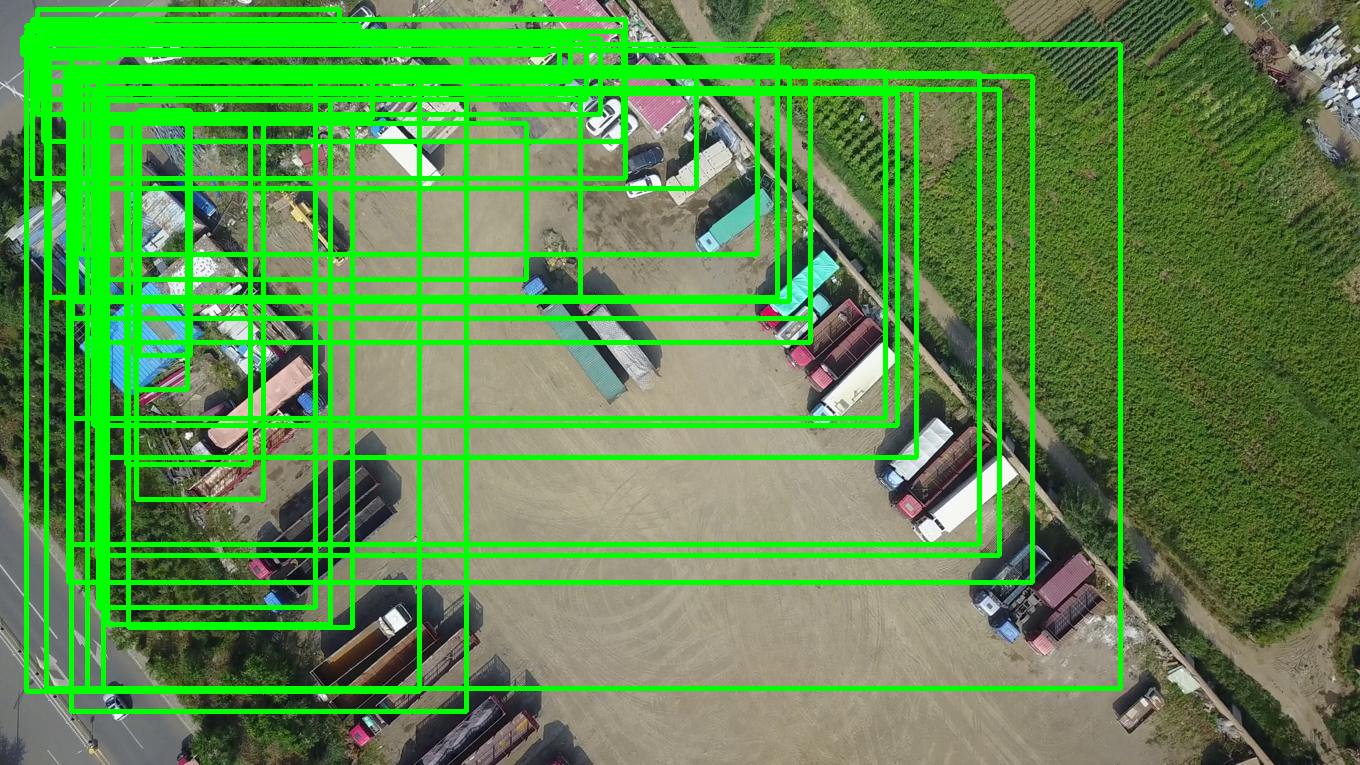

In [58]:
import numpy as np
from tqdm import tqdm
from sahi.utils.cv import read_image_as_pil, visualize_object_predictions
from IPython.display import Image

# export visualizations with ground truths
output_dir = 'sliced_predictions/exp_gt_test'
image = './single_test/images/0000006_06773_d_0000018.jpg'
image_as_pil = read_image_as_pil(image)
color = (0, 255, 0)  # original annotations in green
visual_bbox_gt_thickness = 3
visual_bbox_thickness = 2
visual_text_size = 12
visual_text_thickness = 10
visual_hide_labels = 1
visual_hide_conf = 1
file_name = 'result_gt'
filename_prediction = 'prediction_visual_with_gt'
visual_export_format = 'png'

result = visualize_object_predictions(
    np.ascontiguousarray(image_as_pil),
    object_prediction_list= object_prediction_gt_list,
    rect_th=visual_bbox_gt_thickness,
    text_size=visual_text_size,
    text_th=visual_text_thickness,
    color=color,
    hide_labels=visual_hide_labels,
    hide_conf=visual_hide_conf,
    output_dir=output_dir,
    file_name=filename_prediction,
    export_format= visual_export_format,
)
Image(f'sliced_predictions/exp_gt_test/prediction_visual_with_gt.png')